In [1]:
import anndata
import scanpy as sc

sc.logging.print_version_and_date()
sc.settings.verbosity = 0 

Running Scanpy 1.5.1, on 2020-07-29 10:02.


In [2]:
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, dpi_save=300, vector_friendly=True)
params = {'legend.fontsize': 8,
          'figure.figsize': (3, 3),
         'axes.labelsize':8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

In [3]:
write_folder = '/storage/groups/ml01/workspace/hananeh.aliee/projects/pancreas/write/'
adata = sc.read(write_folder+"adata_proc_microwell")
adata_log = sc.read(write_folder+"adata_log_microwell.h5ad")

In [93]:
adata.shape

(9456, 14498)

In [4]:
adata.var['highly_variable'] = adata_log.var['highly_variable']

In [5]:
adata.X = adata.X.todense()

In [6]:
low_cells = adata.obs['oncology'].value_counts()[adata.obs['oncology'].value_counts()<100].index
adata = adata[~adata.obs['oncology'].isin(low_cells)].copy()

In [7]:
set(adata.obs['study'])

{'hcl_AdultPancreas_1', 'hcl_FetalPancreas_2', 'hcl_FetalPancreas_3'}

In [8]:
adata = adata[~adata.obs['study'].isin(['hcl_AdultPancreas_1'])]

In [9]:
adata_log.X = adata_log.X.todense()

In [10]:
adata_log = adata_log[adata.obs_names]

In [11]:
#adata = adata[adata.obs['oncology']!='Pancreas exocrine cell']

In [82]:
import autogenes as ag
ngenes = 500
centroids = ag.init(adata,use_highly_variable=True,celltype_key='oncology')
ag.optimize(ngen=7000,seed=0,nfeatures=ngenes,mode='fixed',offspring_size=100)#,verbose=False)

gen	nevals	pareto	correlation 	distance        
0  	100   	5     	10.4 - 40.13	2607.4 - 16248.6
1  	100   	6     	9.64 - 36.75	3311.1 - 16248.6
2  	100   	5     	9.64 - 27.34	3862.98 - 16248.6
3  	100   	9     	7.89 - 28.17	3862.98 - 16248.6
4  	100   	10    	7.72 - 27.34	4741.87 - 16248.6
5  	100   	12    	7.65 - 27.34	4741.87 - 16248.6
6  	100   	12    	7.65 - 27.34	4367.42 - 16248.6
7  	100   	13    	7.65 - 27.34	5243.35 - 16248.6
8  	100   	14    	7.65 - 27.34	5290.81 - 16248.6
9  	100   	12    	7.63 - 27.39	5290.72 - 16248.6
10 	100   	13    	7.63 - 27.39	5295.36 - 16248.6
11 	100   	13    	7.42 - 27.35	6196.8 - 16248.6 
12 	100   	17    	7.42 - 27.34	6196.75 - 16248.6
13 	100   	16    	7.42 - 27.33	6211.53 - 16481.36
14 	100   	15    	7.4 - 25.7  	6211.64 - 16481.36
15 	100   	18    	7.4 - 25.7  	6211.76 - 16481.36
16 	100   	27    	7.23 - 16.05	6210.3 - 16481.36 
17 	100   	22    	7.23 - 16.05	6210.3 - 16481.36 
18 	100   	20    	7.23 - 16.05	6210.3 - 16481.36 
19 	100   	20    

162	100   	28    	5.33 - 10.94	11937.62 - 18860.88
163	100   	34    	5.33 - 10.94	11941.74 - 18860.88
164	100   	31    	5.33 - 8.14 	11941.74 - 18860.88
165	100   	29    	5.33 - 8.14 	11941.7 - 18860.88 
166	100   	30    	5.33 - 8.14 	11955.34 - 18860.9 
167	100   	31    	5.33 - 8.14 	11955.26 - 18860.9 
168	100   	26    	5.33 - 8.13 	11955.26 - 19374.4 
169	100   	27    	5.33 - 8.13 	11955.26 - 19374.4 
170	100   	28    	5.33 - 8.13 	11955.26 - 19374.4 
171	100   	30    	5.33 - 8.13 	11955.26 - 19374.4 
172	100   	30    	5.32 - 8.13 	11955.35 - 19374.4 
173	100   	33    	5.23 - 8.13 	11950.49 - 19374.4 
174	100   	35    	5.23 - 8.13 	11950.49 - 19374.4 
175	100   	26    	5.23 - 8.13 	11950.49 - 19374.4 
176	100   	28    	5.23 - 8.13 	11950.49 - 19374.4 
177	100   	28    	5.23 - 8.12 	11950.49 - 19374.4 
178	100   	29    	5.22 - 8.12 	11950.47 - 19374.4 
179	100   	30    	5.22 - 8.12 	11950.47 - 19374.4 
180	100   	26    	5.15 - 8.13 	11950.47 - 19374.4 
181	100   	26    	5.15 - 8.13 	

324	100   	28    	4.29 - 13.84	13055.43 - 20939.08
325	100   	32    	4.29 - 13.84	13055.43 - 20939.08
326	100   	35    	4.29 - 13.84	13100.28 - 20939.08
327	100   	38    	4.29 - 13.84	13100.28 - 20939.08
328	100   	36    	4.29 - 13.84	13100.28 - 20939.08
329	100   	39    	4.28 - 13.84	13100.31 - 20939.08
330	100   	45    	4.28 - 13.84	13100.31 - 20939.08
331	100   	45    	4.28 - 13.84	13100.31 - 20939.08
332	100   	50    	4.28 - 13.84	13100.31 - 20939.08
333	100   	51    	4.28 - 13.84	13143.32 - 20944.52
334	100   	41    	4.28 - 13.84	13062.99 - 20944.52
335	100   	42    	4.28 - 13.84	13062.99 - 20944.52
336	100   	45    	4.28 - 13.84	13062.99 - 20944.7 
337	100   	47    	4.28 - 13.84	13062.99 - 20944.7 
338	100   	51    	4.28 - 13.84	13062.99 - 20944.7 
339	100   	47    	4.27 - 13.84	13146.52 - 20944.7 
340	100   	46    	4.25 - 13.84	13131.77 - 20944.7 
341	100   	48    	4.25 - 13.84	13131.77 - 20944.78
342	100   	51    	4.25 - 13.84	13131.17 - 20944.78
343	100   	48    	4.24 - 13.84	

486	100   	76    	3.77 - 13.87	13938.25 - 22392.05
487	100   	80    	3.77 - 13.87	13937.66 - 22392.05
488	100   	77    	3.76 - 13.87	13938.25 - 22392.05
489	100   	82    	3.76 - 13.86	13938.25 - 22392.11
490	100   	69    	3.75 - 13.86	13938.32 - 22392.11
491	100   	70    	3.75 - 13.86	13938.32 - 22392.17
492	100   	71    	3.75 - 13.86	13938.32 - 22392.17
493	100   	76    	3.75 - 16.56	14065.85 - 22838.6 
494	100   	75    	3.75 - 16.56	14065.8 - 22838.6  
495	100   	76    	3.75 - 16.6 	14065.8 - 22838.6  
496	100   	78    	3.75 - 16.6 	14065.8 - 22838.6  
497	100   	76    	3.75 - 16.56	14065.8 - 22839.0  
498	100   	74    	3.75 - 16.56	14065.8 - 22924.57 
499	100   	75    	3.75 - 16.56	14065.8 - 22924.57 
500	100   	75    	3.75 - 16.56	14065.8 - 22924.57 
501	100   	78    	3.75 - 16.56	14065.8 - 22924.57 
502	100   	79    	3.75 - 16.56	14066.08 - 22924.57
503	100   	83    	3.75 - 16.53	14066.08 - 22924.57
504	100   	75    	3.75 - 16.53	14066.08 - 22924.57
505	100   	77    	3.75 - 16.53	

648	100   	88    	3.4 - 16.46 	13136.92 - 22999.35
649	100   	92    	3.4 - 16.46 	13135.66 - 22999.35
650	100   	97    	3.4 - 16.46 	13136.92 - 22999.35
651	100   	98    	3.4 - 16.46 	13136.92 - 22999.35
652	100   	102   	3.4 - 16.46 	13136.92 - 22999.35
653	100   	106   	3.4 - 16.46 	13136.92 - 22999.35
654	100   	100   	3.4 - 16.46 	13136.92 - 22999.35
655	100   	106   	3.4 - 16.46 	13136.92 - 22999.35
656	100   	107   	3.4 - 16.46 	13136.92 - 22999.35
657	100   	105   	3.4 - 16.46 	13136.92 - 22999.35
658	100   	101   	3.4 - 16.46 	13006.46 - 22999.35
659	100   	101   	3.4 - 16.46 	13136.92 - 22999.35
660	100   	89    	3.4 - 16.46 	13136.98 - 22999.35
661	100   	85    	3.4 - 16.46 	13135.9 - 22999.35 
662	100   	81    	3.4 - 16.46 	13135.9 - 22999.35 
663	100   	78    	3.4 - 16.46 	13135.9 - 22999.35 
664	100   	78    	3.4 - 16.48 	13135.9 - 22999.35 
665	100   	72    	3.4 - 16.48 	13135.9 - 22999.35 
666	100   	77    	3.4 - 16.48 	13135.9 - 22999.35 
667	100   	75    	3.4 - 16.48 	

810	100   	97    	3.31 - 16.37	13199.39 - 23073.83
811	100   	92    	3.31 - 16.37	13199.39 - 23074.02
812	100   	94    	3.31 - 16.37	13199.22 - 23074.02
813	100   	100   	3.31 - 16.37	13199.22 - 23074.02
814	100   	102   	3.31 - 16.37	13202.65 - 23074.02
815	100   	104   	3.31 - 16.37	13198.82 - 23074.02
816	100   	103   	3.31 - 16.37	13198.13 - 23074.29
817	100   	102   	3.31 - 16.36	13198.13 - 23074.29
818	100   	94    	3.31 - 16.36	13198.13 - 23074.29
819	100   	98    	3.31 - 16.36	13198.13 - 23074.29
820	100   	96    	3.3 - 16.36 	13204.13 - 23074.29
821	100   	89    	3.3 - 16.36 	13204.0 - 23074.29 
822	100   	82    	3.3 - 16.36 	13204.0 - 23074.29 
823	100   	79    	3.29 - 16.37	13203.32 - 23074.29
824	100   	83    	3.29 - 16.37	13203.32 - 23074.29
825	100   	86    	3.29 - 16.37	13203.32 - 23074.29
826	100   	91    	3.29 - 16.37	13203.32 - 23074.29
827	100   	88    	3.29 - 16.37	13203.32 - 23074.29
828	100   	85    	3.29 - 16.37	13203.32 - 23074.29
829	100   	87    	3.29 - 16.37	

972	100   	110   	3.23 - 16.33	13212.58 - 23153.51
973	100   	103   	3.23 - 16.33	13212.58 - 23153.51
974	100   	108   	3.23 - 16.33	13212.58 - 23153.51
975	100   	108   	3.23 - 16.3 	13212.58 - 23153.51
976	100   	100   	3.23 - 16.3 	13212.58 - 23153.51
977	100   	100   	3.23 - 16.3 	13212.56 - 23153.51
978	100   	107   	3.23 - 16.3 	13212.58 - 23153.51
979	100   	109   	3.23 - 16.3 	13212.58 - 23153.51
980	100   	109   	3.23 - 16.3 	13212.58 - 23153.51
981	100   	108   	3.23 - 16.3 	13212.58 - 23153.51
982	100   	106   	3.23 - 16.3 	13212.58 - 23153.51
983	100   	109   	3.23 - 16.3 	13212.58 - 23153.51
984	100   	111   	3.23 - 16.3 	13212.58 - 23153.51
985	100   	110   	3.23 - 16.3 	13212.58 - 23153.51
986	100   	115   	3.23 - 16.3 	13212.58 - 23153.51
987	100   	116   	3.23 - 16.3 	13211.87 - 23153.51
988	100   	117   	3.23 - 16.3 	13211.87 - 23153.51
989	100   	119   	3.23 - 16.3 	13211.87 - 23153.51
990	100   	123   	3.23 - 16.3 	13211.87 - 23153.51
991	100   	115   	3.23 - 16.3 	

1131	100   	183   	3.18 - 13.17	13267.01 - 23389.02
1132	100   	186   	3.18 - 13.17	13267.01 - 23389.02
1133	100   	187   	3.18 - 13.17	13267.01 - 23389.02
1134	100   	186   	3.18 - 13.17	13267.01 - 23389.02
1135	100   	185   	3.18 - 13.17	13267.01 - 23389.02
1136	100   	190   	3.18 - 13.17	13267.01 - 23389.02
1137	100   	190   	3.18 - 13.17	13267.01 - 23389.02
1138	100   	191   	3.18 - 13.17	13267.01 - 23389.02
1139	100   	187   	3.18 - 13.17	13267.01 - 23389.02
1140	100   	187   	3.18 - 13.17	13267.01 - 23389.02
1141	100   	177   	3.18 - 13.17	13267.01 - 23389.02
1142	100   	182   	3.18 - 13.17	13267.01 - 23389.02
1143	100   	184   	3.18 - 13.17	13267.03 - 23389.02
1144	100   	183   	3.18 - 13.17	13267.03 - 23389.15
1145	100   	183   	3.18 - 13.17	13267.03 - 23389.15
1146	100   	187   	3.18 - 13.17	13267.03 - 23389.15
1147	100   	187   	3.18 - 13.17	13267.03 - 23389.15
1148	100   	193   	3.18 - 13.17	13267.03 - 23389.15
1149	100   	195   	3.18 - 13.17	13267.03 - 23389.15
1150	100   	

1289	100   	165   	3.15 - 13.27	13277.67 - 23459.07
1290	100   	166   	3.15 - 13.27	13277.67 - 23459.07
1291	100   	163   	3.15 - 13.27	13274.25 - 23459.07
1292	100   	160   	3.15 - 13.26	13274.25 - 23459.2 
1293	100   	158   	3.15 - 13.26	13274.25 - 23459.44
1294	100   	158   	3.15 - 13.26	13274.25 - 23459.44
1295	100   	158   	3.15 - 13.26	13274.25 - 23459.52
1296	100   	160   	3.14 - 13.39	13274.27 - 23462.32
1297	100   	162   	3.14 - 13.39	13274.27 - 23462.32
1298	100   	160   	3.14 - 13.39	13274.27 - 23462.34
1299	100   	160   	3.14 - 13.39	13274.27 - 23462.34
1300	100   	160   	3.14 - 13.39	13274.27 - 23462.34
1301	100   	157   	3.14 - 13.39	13274.27 - 23462.34
1302	100   	157   	3.14 - 13.39	13274.27 - 23462.34
1303	100   	166   	3.14 - 13.39	13275.77 - 23462.34
1304	100   	159   	3.14 - 13.39	13275.77 - 23462.34
1305	100   	157   	3.14 - 13.39	13275.77 - 23462.37
1306	100   	161   	3.14 - 13.39	13275.77 - 23462.37
1307	100   	160   	3.14 - 13.38	13275.77 - 23462.48
1308	100   	

1447	100   	216   	3.11 - 13.03	13275.63 - 23513.71
1448	100   	215   	3.11 - 13.03	13275.63 - 23513.71
1449	100   	216   	3.11 - 13.03	13275.63 - 23513.71
1450	100   	209   	3.11 - 13.03	13275.63 - 23513.71
1451	100   	207   	3.11 - 13.03	13275.64 - 23513.71
1452	100   	211   	3.11 - 13.03	13275.64 - 23513.71
1453	100   	202   	3.11 - 13.03	13275.64 - 23513.71
1454	100   	200   	3.11 - 13.03	13275.64 - 23513.71
1455	100   	202   	3.11 - 13.03	13275.64 - 23513.71
1456	100   	203   	3.11 - 13.03	13275.64 - 23513.71
1457	100   	200   	3.11 - 13.03	13275.64 - 23513.71
1458	100   	199   	3.11 - 13.03	13275.64 - 23513.71
1459	100   	196   	3.11 - 13.03	13275.64 - 23513.71
1460	100   	201   	3.11 - 13.03	13275.64 - 23513.71
1461	100   	206   	3.11 - 13.03	13275.64 - 23513.71
1462	100   	203   	3.11 - 13.03	13275.64 - 23513.71
1463	100   	207   	3.11 - 13.03	13275.64 - 23513.71
1464	100   	204   	3.11 - 13.03	13275.64 - 23513.72
1465	100   	206   	3.11 - 13.03	13275.64 - 23513.72
1466	100   	

1605	100   	148   	3.1 - 12.99 	13275.55 - 23545.61
1606	100   	143   	3.1 - 12.99 	13275.55 - 23545.61
1607	100   	149   	3.1 - 12.99 	13272.27 - 23545.61
1608	100   	152   	3.1 - 12.99 	13272.27 - 23545.61
1609	100   	151   	3.1 - 12.99 	13272.27 - 23545.61
1610	100   	151   	3.1 - 12.99 	13272.27 - 23545.61
1611	100   	153   	3.1 - 12.99 	13272.27 - 23545.61
1612	100   	156   	3.1 - 12.99 	13272.29 - 23545.61
1613	100   	145   	3.1 - 12.99 	13269.84 - 23545.61
1614	100   	147   	3.1 - 12.99 	13269.84 - 23545.61
1615	100   	149   	3.09 - 12.99	13269.89 - 23545.61
1616	100   	147   	3.09 - 12.99	13269.89 - 23545.61
1617	100   	147   	3.09 - 12.99	13269.89 - 23545.61
1618	100   	145   	3.09 - 12.99	13269.89 - 23545.61
1619	100   	148   	3.09 - 12.99	13269.89 - 23545.61
1620	100   	152   	3.09 - 12.99	13269.89 - 23545.67
1621	100   	149   	3.09 - 12.97	13269.85 - 23548.47
1622	100   	138   	3.08 - 12.98	13274.42 - 23548.47
1623	100   	138   	3.08 - 12.97	13274.42 - 23548.47
1624	100   	

1764	100   	260   	3.06 - 13.38	13105.84 - 23670.92
1765	100   	264   	3.06 - 13.38	13105.84 - 23670.92
1766	100   	260   	3.06 - 13.38	13105.84 - 23670.92
1767	100   	263   	3.06 - 13.38	13105.84 - 23670.92
1768	100   	267   	3.06 - 13.38	13105.84 - 23670.92
1769	100   	262   	3.06 - 13.38	13105.84 - 23670.92
1770	100   	258   	3.06 - 13.38	13105.86 - 23670.92
1771	100   	262   	3.06 - 13.38	13105.86 - 23670.92
1772	100   	260   	3.06 - 13.38	13105.86 - 23670.92
1773	100   	263   	3.06 - 13.38	13105.86 - 23670.92
1774	100   	250   	3.06 - 13.38	13105.86 - 23670.92
1775	100   	250   	3.06 - 13.38	13105.86 - 23670.92
1776	100   	254   	3.06 - 13.38	13105.86 - 23670.98
1777	100   	259   	3.06 - 13.38	13105.86 - 23670.98
1778	100   	238   	3.06 - 13.38	13105.86 - 23670.98
1779	100   	243   	3.06 - 13.38	13105.86 - 23689.17
1780	100   	247   	3.06 - 13.38	13105.86 - 23689.17
1781	100   	248   	3.06 - 13.38	13105.86 - 23689.17
1782	100   	245   	3.05 - 13.38	13106.33 - 23689.17
1783	100   	

1922	100   	279   	3.04 - 13.39	13112.63 - 23812.39
1923	100   	281   	3.04 - 13.39	13112.63 - 23812.39
1924	100   	276   	3.04 - 13.39	13112.63 - 23812.39
1925	100   	280   	3.04 - 13.39	13112.63 - 23812.39
1926	100   	283   	3.04 - 13.39	13112.54 - 23812.39
1927	100   	284   	3.04 - 13.39	13112.54 - 23812.43
1928	100   	282   	3.04 - 13.39	13112.54 - 23812.43
1929	100   	279   	3.04 - 13.39	13112.54 - 23812.43
1930	100   	285   	3.03 - 13.39	13112.61 - 23812.43
1931	100   	284   	3.03 - 13.39	13112.61 - 23812.43
1932	100   	279   	3.03 - 13.39	13112.61 - 23812.43
1933	100   	283   	3.03 - 13.39	13112.61 - 23812.43
1934	100   	274   	3.03 - 13.39	13112.61 - 23812.43
1935	100   	279   	3.03 - 13.39	13112.61 - 23812.43
1936	100   	277   	3.03 - 13.39	13112.61 - 23812.43
1937	100   	271   	3.03 - 13.39	13112.61 - 23812.43
1938	100   	271   	3.03 - 13.39	13112.61 - 23812.43
1939	100   	275   	3.03 - 13.39	13112.61 - 23812.43
1940	100   	267   	3.03 - 13.39	13112.61 - 23812.43
1941	100   	

2080	100   	272   	3.0 - 13.35 	13005.24 - 23822.33
2081	100   	274   	3.0 - 13.35 	13005.24 - 23822.33
2082	100   	279   	3.0 - 13.35 	13005.24 - 23822.33
2083	100   	280   	3.0 - 13.35 	13005.41 - 23822.33
2084	100   	282   	3.0 - 13.35 	13005.41 - 23822.33
2085	100   	279   	3.0 - 13.35 	13005.41 - 23822.33
2086	100   	277   	3.0 - 13.35 	13005.41 - 23822.33
2087	100   	282   	3.0 - 13.35 	13005.41 - 23822.33
2088	100   	286   	3.0 - 13.35 	13005.41 - 23822.33
2089	100   	293   	3.0 - 13.35 	13005.41 - 23822.33
2090	100   	298   	3.0 - 13.35 	13005.88 - 23822.33
2091	100   	297   	3.0 - 13.35 	13005.88 - 23822.33
2092	100   	303   	3.0 - 13.35 	13005.88 - 23822.33
2093	100   	292   	3.0 - 13.35 	13005.88 - 23822.33
2094	100   	290   	3.0 - 13.35 	13005.88 - 23822.33
2095	100   	291   	3.0 - 13.35 	13005.88 - 23822.33
2096	100   	297   	3.0 - 13.35 	13005.88 - 23822.33
2097	100   	289   	3.0 - 13.35 	13005.88 - 23822.33
2098	100   	293   	3.0 - 13.35 	13005.88 - 23822.33
2099	100   	

2238	100   	345   	2.99 - 15.14	12999.12 - 24348.85
2239	100   	354   	2.99 - 15.14	12998.95 - 24348.85
2240	100   	359   	2.99 - 15.14	12998.95 - 24348.85
2241	100   	362   	2.99 - 15.14	12998.95 - 24348.85
2242	100   	362   	2.99 - 15.14	12998.95 - 24348.85
2243	100   	362   	2.99 - 15.14	12998.95 - 24348.85
2244	100   	361   	2.99 - 15.14	12998.95 - 24348.85
2245	100   	358   	2.99 - 15.14	12998.95 - 24348.85
2246	100   	362   	2.99 - 15.14	12998.95 - 24348.85
2247	100   	365   	2.99 - 15.14	12998.95 - 24348.85
2248	100   	365   	2.99 - 15.39	12998.95 - 24366.04
2249	100   	366   	2.99 - 15.39	12998.95 - 24366.04
2250	100   	360   	2.99 - 15.39	12998.95 - 24366.04
2251	100   	357   	2.99 - 15.39	12998.95 - 24366.04
2252	100   	359   	2.99 - 15.39	12998.95 - 24366.04
2253	100   	356   	2.99 - 15.39	12998.95 - 24366.04
2254	100   	351   	2.99 - 15.39	12998.95 - 24366.07
2255	100   	349   	2.99 - 15.39	12998.95 - 24366.07
2256	100   	354   	2.99 - 15.39	12998.95 - 24366.07
2257	100   	

2396	100   	321   	2.96 - 14.84	13755.76 - 24427.29
2397	100   	326   	2.96 - 14.84	13755.76 - 24427.29
2398	100   	323   	2.96 - 14.84	13755.76 - 24427.29
2399	100   	325   	2.96 - 14.84	13755.76 - 24427.29
2400	100   	327   	2.96 - 14.84	13755.76 - 24427.29
2401	100   	332   	2.96 - 14.84	13755.76 - 24427.29
2402	100   	330   	2.96 - 14.84	13755.76 - 24427.29
2403	100   	335   	2.96 - 14.84	13755.76 - 24427.29
2404	100   	334   	2.96 - 14.84	13755.76 - 24427.29
2405	100   	335   	2.96 - 14.84	13755.18 - 24427.29
2406	100   	333   	2.96 - 14.84	13755.18 - 24427.29
2407	100   	328   	2.96 - 14.84	13755.18 - 24427.29
2408	100   	327   	2.96 - 14.84	13755.18 - 24427.29
2409	100   	327   	2.96 - 14.84	13755.18 - 24428.77
2410	100   	327   	2.96 - 14.84	13755.18 - 24428.77
2411	100   	326   	2.96 - 14.84	13755.18 - 24428.77
2412	100   	327   	2.96 - 14.84	13755.18 - 24428.77
2413	100   	329   	2.96 - 14.84	13755.18 - 24428.77
2414	100   	329   	2.96 - 14.84	13755.18 - 24428.77
2415	100   	

2554	100   	341   	2.95 - 14.8 	13758.22 - 24436.63
2555	100   	339   	2.95 - 14.8 	13758.22 - 24436.63
2556	100   	341   	2.95 - 14.8 	13758.22 - 24436.63
2557	100   	340   	2.95 - 14.8 	13758.22 - 24436.63
2558	100   	341   	2.95 - 14.8 	13758.22 - 24436.71
2559	100   	342   	2.95 - 14.8 	13758.22 - 24436.71
2560	100   	342   	2.95 - 14.8 	13758.22 - 24436.82
2561	100   	345   	2.95 - 14.8 	13758.22 - 24436.82
2562	100   	346   	2.95 - 14.8 	13758.22 - 24436.82
2563	100   	341   	2.95 - 14.8 	13758.22 - 24436.82
2564	100   	344   	2.95 - 14.8 	13758.22 - 24436.82
2565	100   	343   	2.95 - 14.8 	13758.22 - 24436.82
2566	100   	334   	2.95 - 14.8 	13758.22 - 24436.82
2567	100   	336   	2.95 - 14.8 	13758.22 - 24436.82
2568	100   	333   	2.95 - 14.8 	13758.22 - 24436.82
2569	100   	331   	2.95 - 14.8 	13758.22 - 24436.82
2570	100   	334   	2.95 - 14.8 	13758.22 - 24436.82
2571	100   	342   	2.95 - 14.8 	13758.22 - 24436.82
2572	100   	341   	2.95 - 14.8 	13758.22 - 24436.82
2573	100   	

2712	100   	295   	2.93 - 14.73	13654.29 - 24476.08
2713	100   	299   	2.93 - 14.73	13654.29 - 24476.08
2714	100   	297   	2.93 - 14.73	13654.29 - 24476.08
2715	100   	296   	2.93 - 14.73	13654.29 - 24476.08
2716	100   	298   	2.93 - 14.73	13654.29 - 24476.08
2717	100   	305   	2.93 - 14.73	13654.29 - 24476.08
2718	100   	292   	2.93 - 14.73	13654.29 - 24476.08
2719	100   	281   	2.93 - 14.73	13654.29 - 24476.08
2720	100   	284   	2.93 - 14.73	13654.29 - 24476.08
2721	100   	283   	2.93 - 14.73	13654.29 - 24476.08
2722	100   	281   	2.93 - 14.73	13654.29 - 24476.08
2723	100   	277   	2.93 - 14.73	13654.29 - 24476.08
2724	100   	279   	2.93 - 14.73	13654.29 - 24476.08
2725	100   	282   	2.93 - 14.73	13654.29 - 24476.08
2726	100   	289   	2.93 - 14.73	13654.29 - 24476.08
2727	100   	290   	2.93 - 14.73	13654.29 - 24476.08
2728	100   	294   	2.93 - 14.73	13654.29 - 24476.08
2729	100   	297   	2.93 - 14.73	13654.29 - 24476.08
2730	100   	299   	2.93 - 14.73	13654.29 - 24476.08
2731	100   	

2870	100   	333   	2.92 - 14.71	13653.83 - 24509.22
2871	100   	330   	2.92 - 14.71	13653.83 - 24509.22
2872	100   	327   	2.92 - 14.71	13653.83 - 24509.22
2873	100   	322   	2.92 - 14.71	13653.83 - 24509.22
2874	100   	323   	2.92 - 14.71	13653.83 - 24509.22
2875	100   	320   	2.92 - 14.71	13653.79 - 24509.22
2876	100   	322   	2.92 - 14.71	13653.79 - 24509.22
2877	100   	324   	2.92 - 14.71	13653.79 - 24509.22
2878	100   	316   	2.92 - 14.71	13653.79 - 24509.22
2879	100   	316   	2.92 - 14.71	13653.79 - 24509.22
2880	100   	314   	2.92 - 14.71	13653.79 - 24509.22
2881	100   	319   	2.92 - 14.71	13653.79 - 24509.22
2882	100   	319   	2.92 - 14.71	13653.79 - 24509.22
2883	100   	321   	2.92 - 14.71	13653.79 - 24509.22
2884	100   	318   	2.92 - 14.71	13653.79 - 24509.22
2885	100   	319   	2.92 - 14.71	13653.79 - 24509.22
2886	100   	320   	2.92 - 14.71	13653.79 - 24509.22
2887	100   	324   	2.92 - 14.72	13653.79 - 24511.44
2888	100   	319   	2.92 - 14.72	13653.79 - 24511.44
2889	100   	

3028	100   	370   	2.91 - 14.5 	13654.88 - 24512.23
3029	100   	372   	2.91 - 14.5 	13654.88 - 24512.23
3030	100   	375   	2.91 - 14.5 	13654.88 - 24512.23
3031	100   	373   	2.91 - 14.5 	13654.88 - 24512.23
3032	100   	368   	2.91 - 14.5 	13654.88 - 24512.28
3033	100   	366   	2.91 - 14.5 	13654.88 - 24512.28
3034	100   	367   	2.91 - 14.5 	13654.88 - 24512.28
3035	100   	367   	2.9 - 14.5  	13654.6 - 24512.28 
3036	100   	365   	2.9 - 14.5  	13654.6 - 24512.31 
3037	100   	366   	2.9 - 14.5  	13654.6 - 24512.31 
3038	100   	365   	2.9 - 14.5  	13654.67 - 24512.31
3039	100   	364   	2.9 - 14.5  	13654.67 - 24512.31
3040	100   	368   	2.9 - 14.5  	13654.67 - 24512.31
3041	100   	367   	2.9 - 14.5  	13654.67 - 24512.31
3042	100   	367   	2.9 - 14.5  	13654.67 - 24512.31
3043	100   	370   	2.9 - 14.5  	13654.67 - 24512.31
3044	100   	373   	2.9 - 14.5  	13654.67 - 24512.31
3045	100   	370   	2.9 - 14.5  	13654.67 - 24512.31
3046	100   	366   	2.9 - 14.5  	13654.67 - 24512.31
3047	100   	

3186	100   	450   	2.9 - 14.4  	13652.96 - 24546.91
3187	100   	449   	2.9 - 14.4  	13652.96 - 24546.91
3188	100   	450   	2.9 - 14.4  	13652.96 - 24546.91
3189	100   	451   	2.9 - 14.4  	13652.96 - 24546.91
3190	100   	452   	2.9 - 14.4  	13652.96 - 24546.91
3191	100   	437   	2.9 - 14.4  	13652.96 - 24546.91
3192	100   	439   	2.9 - 14.4  	13652.96 - 24546.91
3193	100   	441   	2.9 - 14.4  	13652.96 - 24546.91
3194	100   	444   	2.9 - 14.4  	13652.96 - 24546.91
3195	100   	446   	2.9 - 14.4  	13652.96 - 24546.91
3196	100   	450   	2.9 - 14.4  	13652.96 - 24546.91
3197	100   	452   	2.9 - 14.4  	13652.96 - 24546.91
3198	100   	456   	2.9 - 14.41 	13652.96 - 24546.97
3199	100   	459   	2.9 - 14.41 	13652.96 - 24546.97
3200	100   	460   	2.9 - 14.39 	13652.96 - 24547.93
3201	100   	462   	2.9 - 14.39 	13652.96 - 24547.93
3202	100   	452   	2.9 - 14.39 	13652.96 - 24548.09
3203	100   	458   	2.9 - 14.39 	13652.96 - 24548.09
3204	100   	459   	2.9 - 14.39 	13652.96 - 24548.09
3205	100   	

3344	100   	434   	2.89 - 14.6 	13654.21 - 24597.89
3345	100   	436   	2.89 - 14.6 	13654.21 - 24597.89
3346	100   	437   	2.89 - 14.6 	13654.21 - 24597.89
3347	100   	435   	2.89 - 14.6 	13654.21 - 24597.89
3348	100   	439   	2.89 - 14.6 	13654.21 - 24597.89
3349	100   	442   	2.89 - 14.6 	13654.21 - 24597.89
3350	100   	437   	2.89 - 14.6 	13654.21 - 24597.89
3351	100   	437   	2.89 - 14.6 	13654.21 - 24597.89
3352	100   	443   	2.89 - 14.6 	13654.21 - 24597.89
3353	100   	447   	2.89 - 14.6 	13654.36 - 24597.89
3354	100   	443   	2.89 - 14.6 	13654.36 - 24597.89
3355	100   	441   	2.89 - 14.6 	13654.36 - 24597.89
3356	100   	436   	2.89 - 14.6 	13654.36 - 24597.89
3357	100   	439   	2.89 - 14.6 	13654.36 - 24597.89
3358	100   	440   	2.89 - 14.6 	13654.36 - 24597.89
3359	100   	437   	2.89 - 14.6 	13654.36 - 24597.89
3360	100   	436   	2.89 - 14.6 	13654.36 - 24597.89
3361	100   	442   	2.89 - 14.6 	13654.36 - 24597.89
3362	100   	442   	2.89 - 14.6 	13654.36 - 24597.89
3363	100   	

3502	100   	469   	2.89 - 14.4 	13652.52 - 24621.08
3503	100   	470   	2.88 - 14.4 	13652.74 - 24621.08
3504	100   	469   	2.88 - 14.4 	13652.74 - 24621.08
3505	100   	465   	2.88 - 14.4 	13652.74 - 24621.08
3506	100   	467   	2.88 - 14.4 	13652.74 - 24621.08
3507	100   	472   	2.88 - 14.4 	13652.74 - 24621.08
3508	100   	475   	2.88 - 14.39	13652.74 - 24647.65
3509	100   	480   	2.88 - 14.39	13652.74 - 24647.65
3510	100   	481   	2.88 - 14.39	13652.74 - 24647.65
3511	100   	482   	2.88 - 14.39	13652.74 - 24647.65
3512	100   	483   	2.88 - 14.39	13652.74 - 24647.65
3513	100   	486   	2.88 - 14.39	13652.74 - 24647.65
3514	100   	489   	2.88 - 14.39	13652.74 - 24647.65
3515	100   	492   	2.88 - 14.39	13652.74 - 24647.65
3516	100   	493   	2.88 - 14.39	13652.74 - 24647.65
3517	100   	496   	2.88 - 14.39	13652.74 - 24647.65
3518	100   	492   	2.88 - 14.39	13652.74 - 24647.65
3519	100   	491   	2.88 - 14.39	13652.74 - 24647.65
3520	100   	496   	2.88 - 14.39	13652.74 - 24647.65
3521	100   	

3660	100   	451   	2.88 - 14.37	13650.51 - 24669.79
3661	100   	455   	2.88 - 14.37	13650.51 - 24669.79
3662	100   	456   	2.88 - 14.37	13650.51 - 24672.9 
3663	100   	458   	2.88 - 14.37	13650.51 - 24672.9 
3664	100   	458   	2.88 - 14.37	13650.51 - 24672.9 
3665	100   	459   	2.88 - 14.37	13650.51 - 24672.9 
3666	100   	460   	2.88 - 14.37	13650.51 - 24672.9 
3667	100   	461   	2.88 - 14.37	13650.39 - 24672.9 
3668	100   	463   	2.88 - 14.37	13650.39 - 24672.9 
3669	100   	462   	2.88 - 14.37	13650.39 - 24672.9 
3670	100   	454   	2.88 - 14.37	13650.39 - 24672.9 
3671	100   	454   	2.88 - 14.37	13650.39 - 24672.9 
3672	100   	452   	2.88 - 14.36	13650.39 - 24673.13
3673	100   	452   	2.88 - 14.36	13650.39 - 24673.13
3674	100   	452   	2.88 - 14.36	13650.39 - 24673.13
3675	100   	453   	2.88 - 14.36	13650.39 - 24673.13
3676	100   	454   	2.88 - 14.36	13650.39 - 24673.13
3677	100   	457   	2.88 - 14.36	13650.39 - 24673.13
3678	100   	458   	2.88 - 14.36	13650.39 - 24673.13
3679	100   	

3819	100   	427   	2.87 - 14.36	13644.3 - 24675.22 
3820	100   	423   	2.87 - 14.36	13644.3 - 24675.22 
3821	100   	420   	2.87 - 14.36	13644.3 - 24675.22 
3822	100   	425   	2.87 - 14.36	13644.3 - 24675.22 
3823	100   	425   	2.87 - 14.36	13644.3 - 24675.22 
3824	100   	423   	2.87 - 14.36	13644.3 - 24675.22 
3825	100   	422   	2.87 - 14.36	13644.3 - 24675.22 
3826	100   	421   	2.87 - 14.36	13644.3 - 24675.22 
3827	100   	415   	2.87 - 14.36	13644.3 - 24675.22 
3828	100   	420   	2.87 - 14.36	13644.3 - 24675.22 
3829	100   	428   	2.87 - 14.36	13644.3 - 24675.22 
3830	100   	427   	2.87 - 14.36	13644.3 - 24675.22 
3831	100   	427   	2.87 - 14.36	13644.3 - 24675.22 
3832	100   	426   	2.87 - 14.36	13644.3 - 24675.22 
3833	100   	425   	2.87 - 14.36	13644.3 - 24675.22 
3834	100   	431   	2.87 - 14.36	13644.3 - 24675.22 
3835	100   	428   	2.87 - 14.36	13644.3 - 24675.22 
3836	100   	427   	2.87 - 14.36	13644.32 - 24675.22
3837	100   	426   	2.87 - 14.36	13644.32 - 24675.22
3838	100   	

3978	100   	452   	2.86 - 14.31	13496.79 - 24733.78
3979	100   	452   	2.86 - 14.31	13496.79 - 24733.78
3980	100   	455   	2.86 - 14.31	13496.79 - 24733.78
3981	100   	452   	2.86 - 14.31	13496.79 - 24733.78
3982	100   	453   	2.86 - 14.31	13496.79 - 24733.78
3983	100   	454   	2.86 - 14.31	13496.79 - 24733.78
3984	100   	454   	2.86 - 14.31	13496.79 - 24733.78
3985	100   	461   	2.86 - 14.31	13496.79 - 24733.78
3986	100   	464   	2.86 - 14.31	13496.79 - 24733.78
3987	100   	470   	2.86 - 14.31	13496.79 - 24733.78
3988	100   	470   	2.86 - 14.31	13496.79 - 24733.78
3989	100   	472   	2.86 - 14.31	13496.79 - 24733.78
3990	100   	476   	2.86 - 14.31	13496.79 - 24733.78
3991	100   	479   	2.86 - 14.31	13496.79 - 24733.78
3992	100   	476   	2.86 - 14.31	13496.79 - 24733.78
3993	100   	478   	2.86 - 14.31	13496.79 - 24733.78
3994	100   	475   	2.86 - 14.31	13496.79 - 24733.78
3995	100   	476   	2.86 - 14.31	13496.79 - 24733.78
3996	100   	470   	2.86 - 14.31	13496.92 - 24733.78
3997	100   	

4136	100   	475   	2.85 - 14.26	13498.37 - 24748.47
4137	100   	474   	2.85 - 14.26	13498.37 - 24748.47
4138	100   	473   	2.85 - 14.26	13498.37 - 24748.47
4139	100   	472   	2.85 - 14.26	13498.37 - 24748.47
4140	100   	470   	2.85 - 14.26	13498.37 - 24748.47
4141	100   	469   	2.85 - 14.26	13498.37 - 24748.47
4142	100   	470   	2.85 - 14.26	13498.37 - 24748.47
4143	100   	472   	2.85 - 14.26	13498.37 - 24748.47
4144	100   	472   	2.85 - 14.26	13498.37 - 24748.47
4145	100   	474   	2.85 - 14.26	13498.37 - 24748.47
4146	100   	473   	2.85 - 14.26	13498.37 - 24748.47
4147	100   	474   	2.85 - 14.26	13498.37 - 24748.47
4148	100   	475   	2.85 - 14.26	13498.37 - 24748.47
4149	100   	478   	2.85 - 14.26	13498.37 - 24748.47
4150	100   	478   	2.85 - 14.26	13498.37 - 24748.47
4151	100   	478   	2.85 - 14.26	13498.37 - 24748.47
4152	100   	476   	2.85 - 14.26	13498.37 - 24748.47
4153	100   	469   	2.85 - 14.26	13498.37 - 24748.47
4154	100   	469   	2.85 - 14.26	13498.37 - 24748.47
4155	100   	

4294	100   	467   	2.84 - 14.26	13496.12 - 24748.89
4295	100   	466   	2.84 - 14.26	13496.12 - 24748.89
4296	100   	469   	2.84 - 14.26	13496.12 - 24748.89
4297	100   	471   	2.84 - 14.26	13496.12 - 24748.89
4298	100   	468   	2.84 - 14.26	13496.12 - 24748.89
4299	100   	470   	2.84 - 14.26	13496.12 - 24748.89
4300	100   	468   	2.84 - 14.26	13496.12 - 24748.89
4301	100   	471   	2.84 - 14.26	13496.12 - 24748.89
4302	100   	471   	2.84 - 14.26	13496.12 - 24748.89
4303	100   	469   	2.84 - 14.26	13496.12 - 24748.89
4304	100   	468   	2.84 - 14.26	13496.12 - 24748.89
4305	100   	464   	2.84 - 14.26	13496.12 - 24748.89
4306	100   	466   	2.84 - 14.26	13496.12 - 24748.89
4307	100   	462   	2.84 - 14.26	13496.12 - 24748.89
4308	100   	463   	2.84 - 14.25	13496.12 - 24748.91
4309	100   	467   	2.84 - 14.25	13496.12 - 24748.91
4310	100   	472   	2.84 - 14.25	13496.12 - 24748.91
4311	100   	473   	2.84 - 14.25	13496.12 - 24749.06
4312	100   	473   	2.84 - 14.25	13496.12 - 24749.06
4313	100   	

4452	100   	526   	2.83 - 14.25	13498.32 - 24769.84
4453	100   	525   	2.83 - 14.25	13498.32 - 24769.84
4454	100   	527   	2.83 - 14.25	13498.32 - 24769.84
4455	100   	525   	2.83 - 14.25	13498.32 - 24769.84
4456	100   	526   	2.83 - 14.25	13498.32 - 24769.84
4457	100   	522   	2.83 - 14.25	13498.32 - 24769.84
4458	100   	524   	2.83 - 14.25	13498.32 - 24769.84
4459	100   	512   	2.83 - 14.25	13498.32 - 24769.84
4460	100   	515   	2.83 - 14.25	13497.58 - 24769.84
4461	100   	518   	2.83 - 14.25	13497.59 - 24769.84
4462	100   	513   	2.83 - 14.25	13497.59 - 24769.84
4463	100   	506   	2.83 - 14.25	13497.59 - 24769.84
4464	100   	504   	2.83 - 14.25	13497.59 - 24769.84
4465	100   	499   	2.83 - 14.25	13497.59 - 24769.84
4466	100   	499   	2.83 - 14.25	13497.59 - 24769.84
4467	100   	493   	2.83 - 14.25	13497.59 - 24769.84
4468	100   	488   	2.83 - 14.25	13497.59 - 24769.84
4469	100   	493   	2.83 - 14.25	13497.59 - 24769.84
4470	100   	497   	2.83 - 14.25	13497.59 - 24769.84
4471	100   	

4610	100   	545   	2.82 - 14.21	13496.25 - 24773.15
4611	100   	546   	2.82 - 14.21	13496.25 - 24773.15
4612	100   	544   	2.82 - 14.21	13496.25 - 24773.15
4613	100   	546   	2.82 - 14.21	13496.25 - 24773.18
4614	100   	546   	2.82 - 14.21	13496.25 - 24773.18
4615	100   	537   	2.82 - 14.21	13496.25 - 24773.18
4616	100   	536   	2.82 - 14.21	13496.25 - 24773.18
4617	100   	537   	2.82 - 14.21	13496.25 - 24773.18
4618	100   	537   	2.82 - 14.21	13496.25 - 24773.18
4619	100   	537   	2.82 - 14.21	13496.25 - 24773.18
4620	100   	541   	2.82 - 14.21	13496.25 - 24773.18
4621	100   	544   	2.82 - 14.21	13496.25 - 24773.18
4622	100   	547   	2.82 - 14.23	13496.25 - 24780.56
4623	100   	548   	2.82 - 14.23	13496.25 - 24780.56
4624	100   	545   	2.82 - 14.23	13496.25 - 24780.56
4625	100   	547   	2.82 - 14.23	13496.25 - 24780.56
4626	100   	549   	2.82 - 14.23	13496.25 - 24780.56
4627	100   	552   	2.82 - 14.23	13496.25 - 24781.21
4628	100   	554   	2.82 - 14.23	13496.25 - 24781.21
4629	100   	

4769	100   	533   	2.81 - 14.32	13498.4 - 24787.46 
4770	100   	536   	2.81 - 14.32	13498.4 - 24787.46 
4771	100   	538   	2.81 - 14.32	13498.4 - 24787.46 
4772	100   	537   	2.81 - 14.32	13498.4 - 24787.46 
4773	100   	530   	2.81 - 14.32	13498.4 - 24787.46 
4774	100   	526   	2.81 - 14.32	13498.4 - 24787.46 
4775	100   	524   	2.81 - 14.32	13498.4 - 24787.46 
4776	100   	529   	2.81 - 14.32	13498.4 - 24787.53 
4777	100   	529   	2.81 - 14.32	13498.4 - 24787.53 
4778	100   	521   	2.81 - 14.32	13498.4 - 24787.53 
4779	100   	522   	2.81 - 14.32	13498.4 - 24787.53 
4780	100   	528   	2.81 - 14.32	13498.4 - 24787.53 
4781	100   	525   	2.81 - 14.32	13498.4 - 24787.53 
4782	100   	525   	2.81 - 14.32	13498.4 - 24787.53 
4783	100   	521   	2.81 - 14.32	13498.4 - 24787.53 
4784	100   	517   	2.81 - 14.32	13498.4 - 24787.53 
4785	100   	515   	2.81 - 14.32	13498.4 - 24787.53 
4786	100   	519   	2.81 - 14.32	13498.4 - 24787.53 
4787	100   	522   	2.81 - 14.32	13498.4 - 24787.53 
4788	100   	

4928	100   	565   	2.81 - 14.34	13498.35 - 24792.25
4929	100   	565   	2.81 - 14.34	13498.35 - 24792.25
4930	100   	566   	2.81 - 14.34	13498.35 - 24792.25
4931	100   	569   	2.81 - 14.34	13498.35 - 24792.25
4932	100   	572   	2.81 - 14.34	13498.35 - 24792.25
4933	100   	572   	2.81 - 14.34	13498.35 - 24792.25
4934	100   	573   	2.81 - 14.34	13498.35 - 24792.25
4935	100   	573   	2.81 - 14.34	13498.35 - 24792.25
4936	100   	574   	2.81 - 14.34	13498.35 - 24792.25
4937	100   	579   	2.81 - 14.34	13498.35 - 24792.25
4938	100   	582   	2.81 - 14.34	13498.35 - 24792.25
4939	100   	578   	2.81 - 14.34	13498.35 - 24792.25
4940	100   	580   	2.81 - 14.34	13498.35 - 24792.25
4941	100   	573   	2.81 - 14.34	13498.35 - 24792.25
4942	100   	569   	2.81 - 14.34	13498.35 - 24792.25
4943	100   	567   	2.81 - 14.34	13498.35 - 24792.25
4944	100   	566   	2.81 - 14.34	13498.35 - 24792.25
4945	100   	566   	2.81 - 14.34	13498.35 - 24792.25
4946	100   	568   	2.81 - 14.34	13498.35 - 24792.25
4947	100   	

5086	100   	547   	2.8 - 14.35 	13488.28 - 24799.48
5087	100   	549   	2.8 - 14.35 	13488.28 - 24799.48
5088	100   	551   	2.8 - 14.35 	13488.28 - 24799.48
5089	100   	547   	2.8 - 14.35 	13488.28 - 24799.48
5090	100   	546   	2.8 - 14.35 	13488.28 - 24799.48
5091	100   	543   	2.8 - 14.35 	13488.28 - 24799.48
5092	100   	546   	2.8 - 14.35 	13488.28 - 24799.48
5093	100   	547   	2.8 - 14.35 	13488.28 - 24799.48
5094	100   	548   	2.8 - 14.35 	13488.28 - 24799.48
5095	100   	551   	2.8 - 14.35 	13488.23 - 24799.48
5096	100   	553   	2.8 - 14.35 	13488.23 - 24799.48
5097	100   	555   	2.8 - 14.35 	13488.23 - 24799.48
5098	100   	551   	2.8 - 14.35 	13488.23 - 24799.48
5099	100   	550   	2.8 - 14.35 	13488.23 - 24799.48
5100	100   	552   	2.8 - 14.35 	13488.23 - 24799.48
5101	100   	551   	2.8 - 14.35 	13488.23 - 24799.48
5102	100   	555   	2.8 - 14.35 	13488.23 - 24799.48
5103	100   	549   	2.8 - 14.35 	13488.23 - 24799.48
5104	100   	552   	2.8 - 14.35 	13488.23 - 24799.48
5105	100   	

5244	100   	533   	2.8 - 14.41 	13488.31 - 25078.44
5245	100   	534   	2.8 - 14.41 	13488.31 - 25078.44
5246	100   	533   	2.8 - 14.41 	13488.31 - 25078.44
5247	100   	532   	2.8 - 14.41 	13488.31 - 25078.44
5248	100   	535   	2.8 - 14.41 	13488.31 - 25078.44
5249	100   	534   	2.8 - 14.41 	13488.31 - 25078.44
5250	100   	528   	2.8 - 14.41 	13488.31 - 25078.44
5251	100   	533   	2.8 - 14.41 	13488.31 - 25078.44
5252	100   	530   	2.8 - 14.41 	13488.31 - 25078.46
5253	100   	529   	2.8 - 14.41 	13488.31 - 25078.46
5254	100   	526   	2.8 - 14.41 	13488.31 - 25078.46
5255	100   	529   	2.8 - 14.41 	13488.31 - 25078.46
5256	100   	529   	2.8 - 14.41 	13488.31 - 25078.46
5257	100   	529   	2.8 - 14.41 	13488.31 - 25078.46
5258	100   	534   	2.8 - 14.41 	13488.31 - 25078.46
5259	100   	534   	2.8 - 14.41 	13488.31 - 25078.46
5260	100   	537   	2.8 - 14.41 	13488.31 - 25078.46
5261	100   	535   	2.8 - 14.41 	13488.31 - 25078.46
5262	100   	533   	2.8 - 14.41 	13488.31 - 25078.46
5263	100   	

5402	100   	547   	2.79 - 14.38	13488.19 - 25079.45
5403	100   	547   	2.79 - 14.38	13488.19 - 25079.45
5404	100   	550   	2.79 - 14.38	13488.19 - 25079.45
5405	100   	548   	2.79 - 14.38	13488.19 - 25079.48
5406	100   	549   	2.79 - 14.38	13488.19 - 25079.48
5407	100   	553   	2.79 - 14.38	13488.19 - 25079.48
5408	100   	553   	2.79 - 14.38	13488.19 - 25079.48
5409	100   	553   	2.79 - 14.38	13488.19 - 25079.48
5410	100   	556   	2.79 - 14.38	13488.19 - 25079.48
5411	100   	556   	2.79 - 14.38	13488.19 - 25079.48
5412	100   	556   	2.79 - 14.38	13488.19 - 25079.48
5413	100   	560   	2.79 - 14.38	13488.19 - 25079.48
5414	100   	561   	2.79 - 14.38	13488.19 - 25079.48
5415	100   	564   	2.79 - 14.38	13488.19 - 25079.48
5416	100   	569   	2.79 - 14.38	13488.19 - 25079.48
5417	100   	567   	2.79 - 14.38	13488.19 - 25079.48
5418	100   	567   	2.79 - 14.38	13488.19 - 25079.48
5419	100   	571   	2.79 - 14.38	13488.21 - 25079.48
5420	100   	572   	2.79 - 14.38	13488.21 - 25079.48
5421	100   	

5560	100   	651   	2.79 - 14.36	13477.17 - 25081.68
5561	100   	651   	2.79 - 14.36	13477.17 - 25081.68
5562	100   	650   	2.79 - 14.36	13477.17 - 25081.68
5563	100   	651   	2.79 - 14.36	13477.17 - 25081.68
5564	100   	649   	2.79 - 14.36	13477.1 - 25081.68 
5565	100   	652   	2.79 - 14.36	13477.1 - 25081.68 
5566	100   	656   	2.79 - 14.36	13477.1 - 25081.68 
5567	100   	660   	2.79 - 14.36	13477.1 - 25081.68 
5568	100   	663   	2.79 - 14.36	13477.1 - 25081.68 
5569	100   	662   	2.79 - 14.36	13477.1 - 25081.69 
5570	100   	661   	2.79 - 14.36	13477.68 - 25081.69
5571	100   	665   	2.79 - 14.36	13477.68 - 25081.69
5572	100   	666   	2.79 - 14.36	13477.68 - 25081.69
5573	100   	666   	2.79 - 14.36	13479.81 - 25081.69
5574	100   	667   	2.79 - 14.36	13479.81 - 25081.69
5575	100   	668   	2.79 - 14.36	13479.81 - 25081.69
5576	100   	670   	2.79 - 14.36	13479.81 - 25081.69
5577	100   	671   	2.79 - 14.36	13479.81 - 25081.69
5578	100   	670   	2.79 - 14.36	13479.81 - 25081.69
5579	100   	

5718	100   	655   	2.79 - 14.33	13478.04 - 25086.89
5719	100   	656   	2.79 - 14.33	13478.04 - 25086.89
5720	100   	650   	2.79 - 14.33	13478.04 - 25086.89
5721	100   	650   	2.79 - 14.33	13478.04 - 25086.89
5722	100   	651   	2.79 - 14.33	13478.04 - 25086.89
5723	100   	654   	2.79 - 14.33	13478.04 - 25086.89
5724	100   	653   	2.79 - 14.33	13478.04 - 25086.89
5725	100   	656   	2.79 - 14.33	13478.04 - 25086.89
5726	100   	657   	2.79 - 14.33	13478.04 - 25086.89
5727	100   	657   	2.79 - 14.33	13478.04 - 25086.89
5728	100   	654   	2.79 - 14.33	13478.04 - 25086.89
5729	100   	655   	2.79 - 14.33	13478.04 - 25086.89
5730	100   	654   	2.79 - 14.33	13478.04 - 25086.89
5731	100   	654   	2.79 - 14.33	13478.04 - 25086.89
5732	100   	655   	2.79 - 14.33	13478.04 - 25086.89
5733	100   	655   	2.79 - 14.33	13478.04 - 25086.89
5734	100   	655   	2.78 - 14.33	13477.97 - 25086.89
5735	100   	658   	2.78 - 14.33	13477.97 - 25086.89
5736	100   	659   	2.78 - 14.33	13477.97 - 25086.89
5737	100   	

5876	100   	670   	2.78 - 14.33	13477.39 - 25087.05
5877	100   	672   	2.78 - 14.33	13477.39 - 25087.05
5878	100   	674   	2.78 - 14.33	13477.39 - 25087.05
5879	100   	666   	2.78 - 14.33	13477.39 - 25087.05
5880	100   	662   	2.78 - 14.33	13477.39 - 25087.05
5881	100   	665   	2.78 - 14.33	13477.39 - 25087.05
5882	100   	667   	2.78 - 14.33	13477.39 - 25087.05
5883	100   	670   	2.78 - 14.33	13477.39 - 25087.05
5884	100   	673   	2.78 - 14.33	13477.39 - 25087.05
5885	100   	672   	2.78 - 14.33	13477.39 - 25087.05
5886	100   	675   	2.78 - 14.33	13477.39 - 25087.05
5887	100   	675   	2.78 - 14.33	13477.39 - 25087.05
5888	100   	676   	2.78 - 14.33	13477.39 - 25087.05
5889	100   	670   	2.78 - 14.33	13477.39 - 25087.05
5890	100   	666   	2.78 - 14.33	13477.39 - 25087.05
5891	100   	666   	2.78 - 14.33	13477.39 - 25087.05
5892	100   	667   	2.78 - 14.33	13477.39 - 25087.05
5893	100   	667   	2.78 - 14.33	13477.39 - 25087.05
5894	100   	666   	2.78 - 14.33	13477.39 - 25087.05
5895	100   	

6034	100   	689   	2.78 - 14.33	13476.81 - 25087.72
6035	100   	690   	2.78 - 14.33	13476.81 - 25087.72
6036	100   	692   	2.78 - 14.33	13476.81 - 25087.72
6037	100   	693   	2.78 - 14.33	13476.81 - 25087.72
6038	100   	693   	2.78 - 14.33	13476.81 - 25087.72
6039	100   	696   	2.78 - 14.33	13476.81 - 25087.72
6040	100   	693   	2.78 - 14.33	13476.81 - 25087.72
6041	100   	696   	2.78 - 14.33	13476.81 - 25087.72
6042	100   	700   	2.77 - 14.33	13476.91 - 25087.72
6043	100   	693   	2.77 - 14.33	13476.91 - 25087.72
6044	100   	696   	2.77 - 14.33	13476.91 - 25087.72
6045	100   	694   	2.77 - 14.33	13476.91 - 25087.72
6046	100   	696   	2.77 - 14.33	13476.91 - 25087.72
6047	100   	697   	2.77 - 14.33	13476.91 - 25087.72
6048	100   	699   	2.77 - 14.33	13476.91 - 25087.72
6049	100   	696   	2.77 - 14.33	13476.91 - 25087.72
6050	100   	696   	2.77 - 14.33	13476.91 - 25087.72
6051	100   	697   	2.77 - 14.33	13476.91 - 25087.72
6052	100   	697   	2.77 - 14.33	13476.91 - 25087.72
6053	100   	

6193	100   	658   	2.76 - 14.3 	13486.75 - 25096.99
6194	100   	657   	2.76 - 14.3 	13486.75 - 25096.99
6195	100   	654   	2.76 - 14.3 	13486.75 - 25096.99
6196	100   	656   	2.76 - 14.3 	13486.75 - 25096.99
6197	100   	657   	2.76 - 14.3 	13486.75 - 25096.99
6198	100   	659   	2.76 - 14.3 	13486.75 - 25096.99
6199	100   	661   	2.76 - 14.3 	13486.75 - 25096.99
6200	100   	662   	2.76 - 14.3 	13486.75 - 25096.99
6201	100   	656   	2.76 - 14.3 	13486.75 - 25096.99
6202	100   	656   	2.76 - 14.3 	13486.75 - 25096.99
6203	100   	658   	2.76 - 14.3 	13486.75 - 25096.99
6204	100   	660   	2.76 - 14.3 	13486.75 - 25096.99
6205	100   	660   	2.76 - 14.3 	13486.75 - 25096.99
6206	100   	659   	2.76 - 14.3 	13486.75 - 25096.99
6207	100   	662   	2.76 - 14.3 	13486.75 - 25096.99
6208	100   	651   	2.76 - 14.3 	13486.75 - 25096.99
6209	100   	646   	2.76 - 14.3 	13486.75 - 25096.99
6210	100   	636   	2.76 - 14.3 	13486.75 - 25096.99
6211	100   	639   	2.76 - 14.3 	13486.75 - 25096.99
6212	100   	

6351	100   	581   	2.76 - 14.31	13487.14 - 25101.84
6352	100   	580   	2.76 - 14.31	13487.14 - 25101.84
6353	100   	581   	2.76 - 14.31	13487.14 - 25101.84
6354	100   	586   	2.76 - 14.31	13487.14 - 25101.87
6355	100   	586   	2.76 - 14.31	13487.14 - 25101.87
6356	100   	582   	2.76 - 14.31	13487.14 - 25101.87
6357	100   	582   	2.76 - 14.31	13487.14 - 25101.87
6358	100   	582   	2.76 - 14.31	13487.14 - 25101.87
6359	100   	582   	2.76 - 14.31	13487.14 - 25101.87
6360	100   	587   	2.76 - 14.31	13487.14 - 25102.02
6361	100   	586   	2.76 - 14.31	13487.14 - 25102.02
6362	100   	585   	2.76 - 14.31	13487.14 - 25102.02
6363	100   	577   	2.76 - 14.31	13487.14 - 25103.17
6364	100   	580   	2.76 - 14.31	13487.14 - 25103.17
6365	100   	581   	2.76 - 14.31	13487.14 - 25103.17
6366	100   	586   	2.76 - 14.31	13487.14 - 25103.17
6367	100   	586   	2.76 - 14.31	13487.14 - 25103.17
6368	100   	586   	2.76 - 14.31	13487.14 - 25103.17
6369	100   	588   	2.76 - 14.31	13487.14 - 25103.17
6370	100   	

6509	100   	649   	2.76 - 14.35	13485.34 - 25110.72
6510	100   	651   	2.76 - 14.35	13485.34 - 25110.72
6511	100   	652   	2.76 - 14.35	13485.34 - 25110.72
6512	100   	651   	2.76 - 14.35	13485.34 - 25110.72
6513	100   	651   	2.76 - 14.35	13485.34 - 25110.72
6514	100   	650   	2.76 - 14.35	13485.34 - 25110.72
6515	100   	650   	2.76 - 14.35	13485.34 - 25110.72
6516	100   	653   	2.76 - 14.35	13485.34 - 25110.72
6517	100   	657   	2.76 - 14.35	13485.34 - 25110.72
6518	100   	661   	2.76 - 14.35	13485.34 - 25110.72
6519	100   	663   	2.76 - 14.35	13485.34 - 25110.72
6520	100   	664   	2.76 - 14.35	13485.34 - 25110.72
6521	100   	662   	2.76 - 14.35	13485.34 - 25110.72
6522	100   	661   	2.76 - 14.35	13485.34 - 25110.72
6523	100   	663   	2.76 - 14.35	13485.34 - 25110.72
6524	100   	663   	2.76 - 14.35	13485.34 - 25110.72
6525	100   	663   	2.76 - 14.35	13485.34 - 25110.72
6526	100   	665   	2.76 - 14.35	13485.34 - 25110.72
6527	100   	666   	2.76 - 14.35	13485.34 - 25110.72
6528	100   	

6667	100   	655   	2.75 - 14.33	13487.4 - 25113.8  
6668	100   	655   	2.75 - 14.33	13487.4 - 25113.8  
6669	100   	655   	2.75 - 14.33	13487.4 - 25113.8  
6670	100   	651   	2.75 - 14.33	13487.4 - 25113.8  
6671	100   	653   	2.75 - 14.33	13487.4 - 25118.3  
6672	100   	655   	2.75 - 14.33	13487.4 - 25118.3  
6673	100   	657   	2.75 - 14.33	13487.4 - 25118.3  
6674	100   	659   	2.75 - 14.33	13487.4 - 25118.3  
6675	100   	660   	2.75 - 14.33	13487.4 - 25118.3  
6676	100   	654   	2.75 - 14.33	13487.4 - 25118.3  
6677	100   	656   	2.75 - 14.33	13487.4 - 25118.3  
6678	100   	656   	2.75 - 14.33	13487.4 - 25118.3  
6679	100   	654   	2.75 - 14.33	13487.4 - 25118.3  
6680	100   	656   	2.75 - 14.33	13487.4 - 25118.3  
6681	100   	656   	2.75 - 14.33	13487.4 - 25118.3  
6682	100   	656   	2.75 - 14.33	13487.4 - 25118.3  
6683	100   	647   	2.75 - 14.33	13487.4 - 25118.3  
6684	100   	643   	2.75 - 14.33	13487.4 - 25118.3  
6685	100   	645   	2.75 - 14.33	13487.4 - 25118.3  
6686	100   	

6825	100   	690   	2.75 - 14.31	13486.09 - 25122.9 
6826	100   	692   	2.75 - 14.31	13486.09 - 25122.9 
6827	100   	692   	2.75 - 14.31	13486.09 - 25122.9 
6828	100   	698   	2.75 - 14.31	13486.09 - 25122.9 
6829	100   	685   	2.75 - 14.31	13486.09 - 25122.9 
6830	100   	685   	2.75 - 14.31	13486.09 - 25122.9 
6831	100   	686   	2.75 - 14.31	13486.09 - 25122.9 
6832	100   	672   	2.75 - 14.31	13486.09 - 25122.9 
6833	100   	668   	2.75 - 14.31	13486.09 - 25122.94
6834	100   	670   	2.75 - 14.31	13486.09 - 25122.94
6835	100   	656   	2.75 - 14.31	13486.09 - 25122.94
6836	100   	656   	2.75 - 14.31	13486.09 - 25122.94
6837	100   	652   	2.75 - 14.31	13486.09 - 25122.94
6838	100   	656   	2.75 - 14.31	13486.09 - 25122.94
6839	100   	657   	2.75 - 14.31	13486.09 - 25122.94
6840	100   	652   	2.75 - 14.29	13486.09 - 25135.12
6841	100   	657   	2.75 - 14.29	13486.09 - 25135.12
6842	100   	659   	2.75 - 14.29	13486.09 - 25135.12
6843	100   	656   	2.75 - 14.29	13486.1 - 25135.12 
6844	100   	

6983	100   	683   	2.75 - 14.25	13486.28 - 25177.11
6984	100   	686   	2.75 - 14.25	13486.28 - 25177.11
6985	100   	692   	2.75 - 14.25	13486.28 - 25177.11
6986	100   	691   	2.75 - 14.25	13486.28 - 25177.11
6987	100   	689   	2.75 - 14.25	13486.28 - 25177.11
6988	100   	687   	2.75 - 14.25	13486.28 - 25177.11
6989	100   	679   	2.75 - 14.25	13486.28 - 25177.11
6990	100   	680   	2.75 - 14.25	13486.28 - 25177.11
6991	100   	679   	2.75 - 14.25	13486.28 - 25177.11
6992	100   	675   	2.75 - 14.25	13486.28 - 25177.11
6993	100   	676   	2.75 - 14.25	13486.28 - 25177.11
6994	100   	680   	2.75 - 14.25	13486.28 - 25177.11
6995	100   	683   	2.75 - 14.25	13486.28 - 25177.11
6996	100   	685   	2.75 - 14.25	13486.28 - 25177.11
6997	100   	684   	2.75 - 14.25	13486.28 - 25177.11
6998	100   	686   	2.75 - 14.25	13486.28 - 25177.11
6999	100   	683   	2.75 - 14.25	13486.28 - 25177.11
7000	100   	685   	2.75 - 14.25	13486.28 - 25177.11


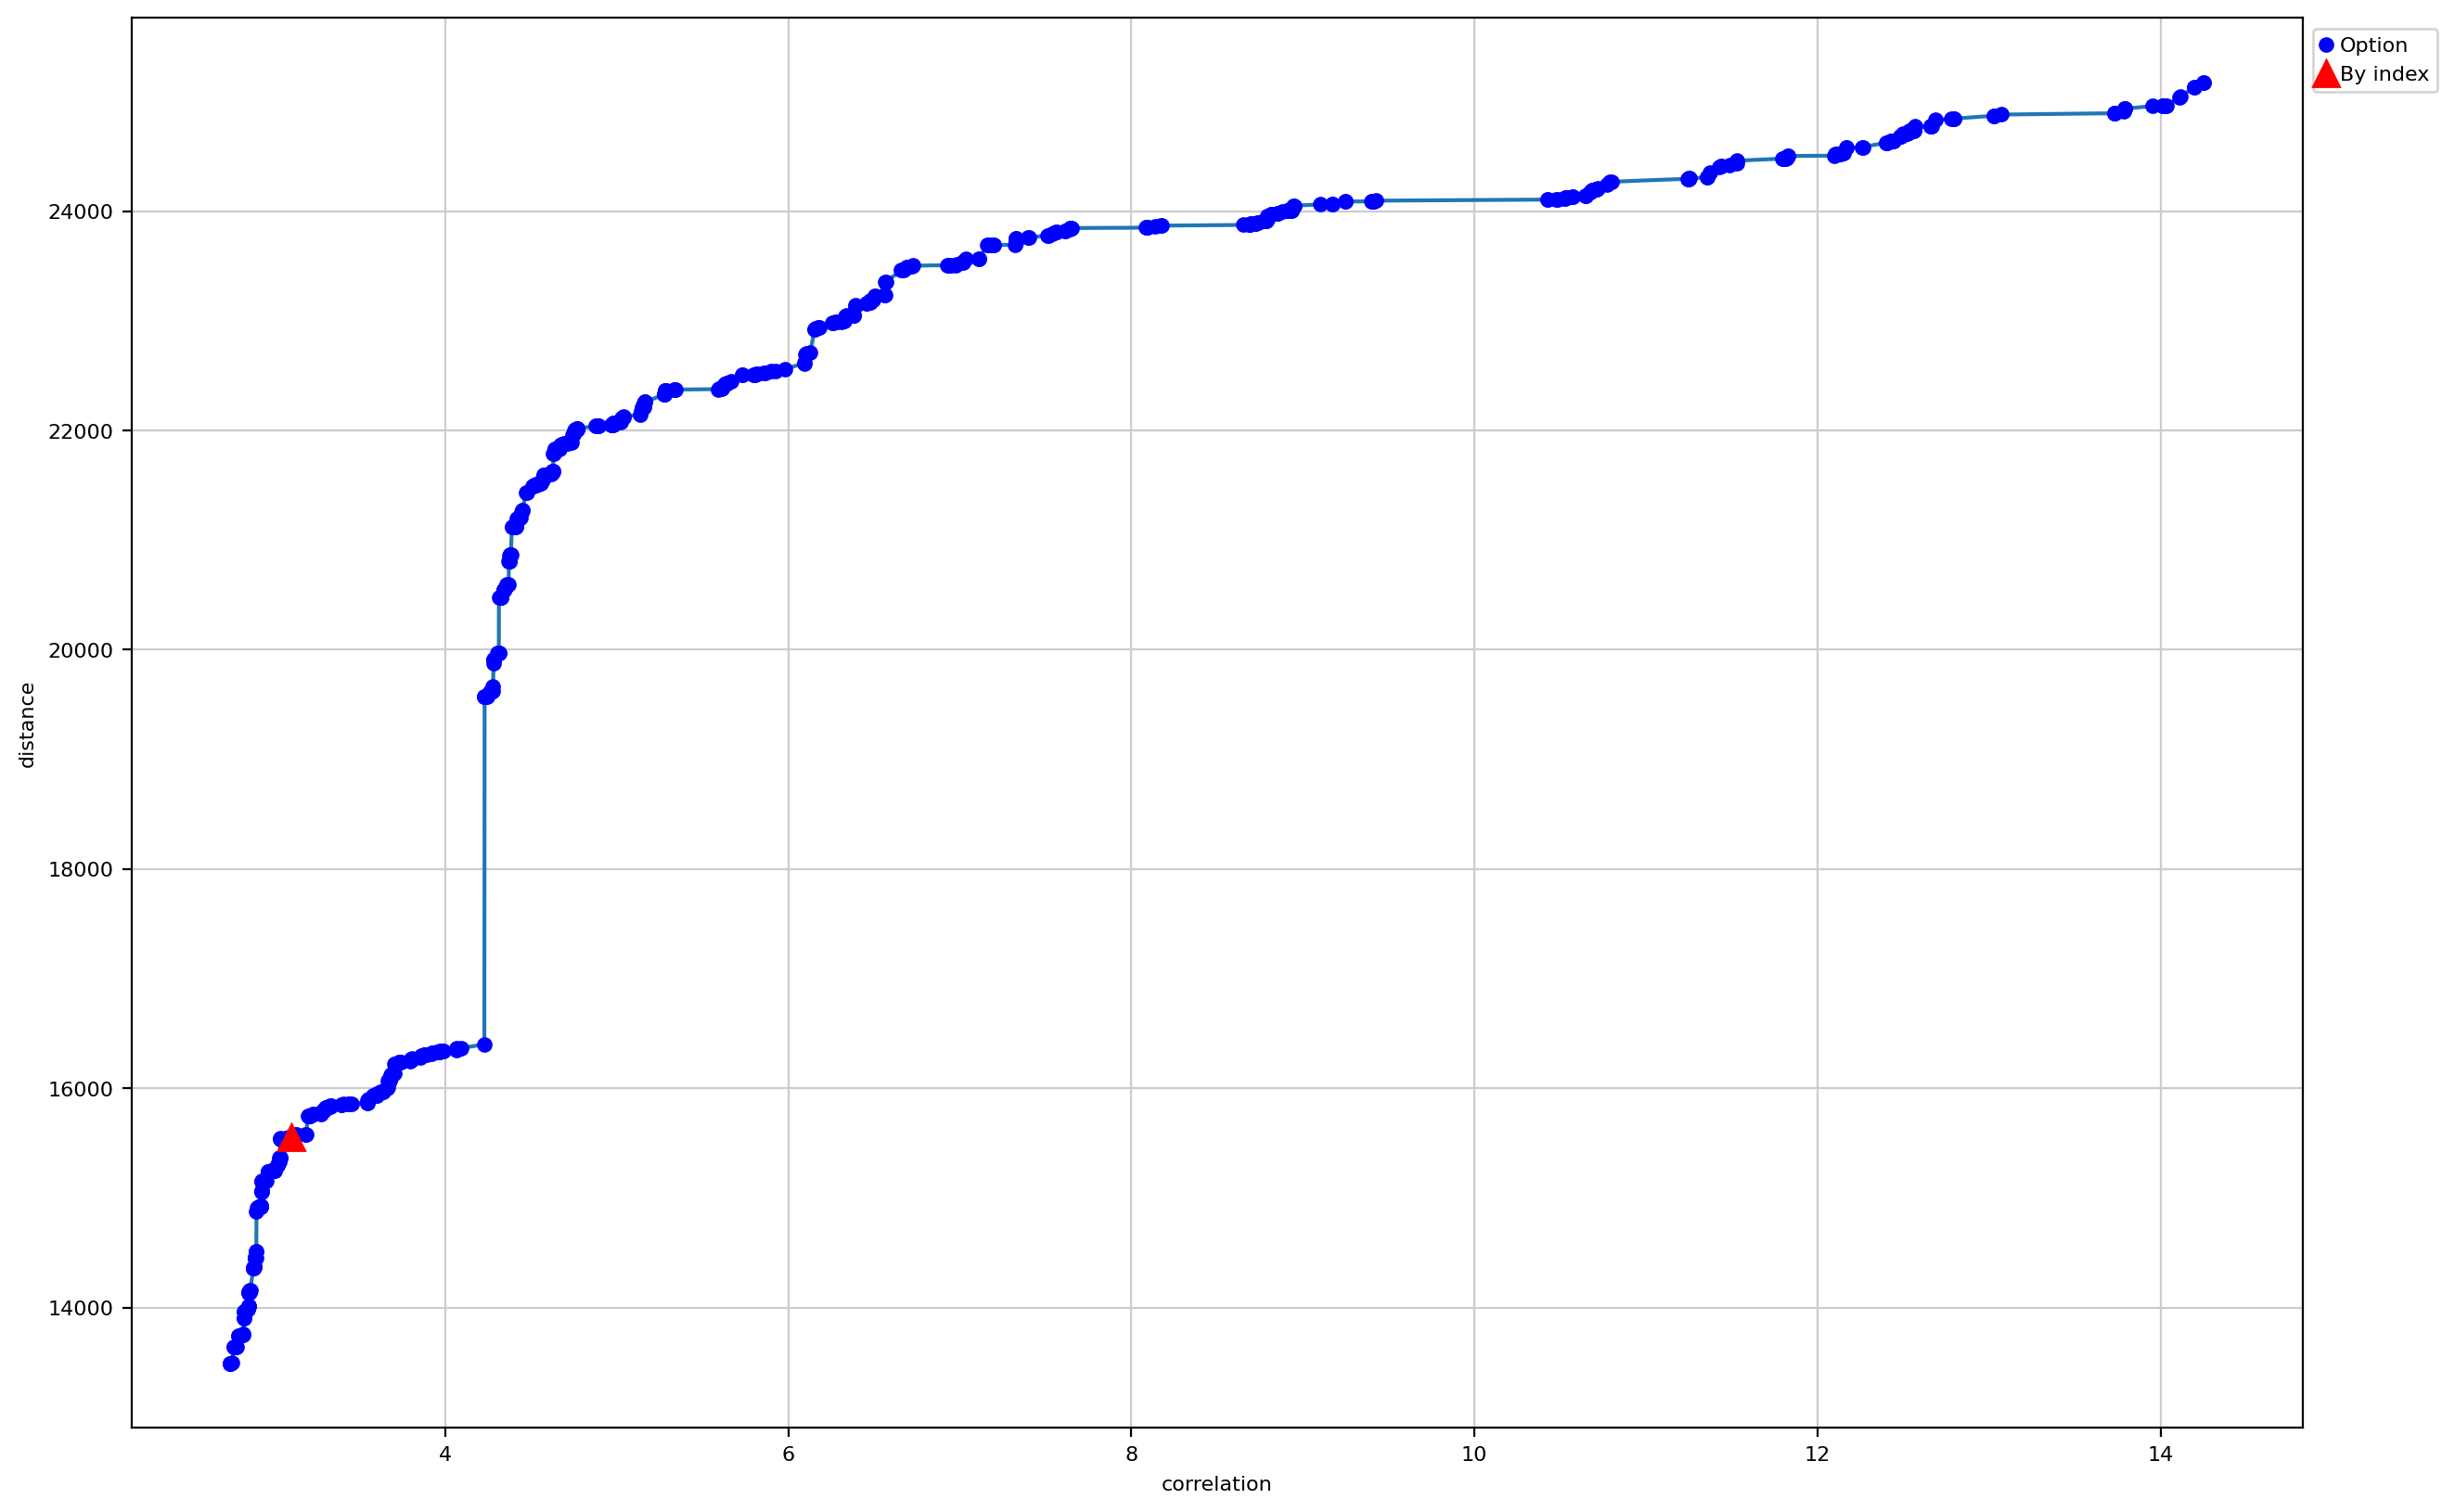

In [83]:
ag.plot(size='large',index=100)

In [14]:
#selection = ag.select(index=50)

In [84]:
selection = ag.select(index=0)

In [85]:
import pandas as pd
centroids_sc_pareto = pd.DataFrame(centroids[:,selection].X.T,index=centroids[:,selection].var_names,columns=centroids[:,selection].obs_names)
centroids_sc_pareto.shape

(500, 12)

In [86]:
#centroids_sc_pareto.to_csv('centroids_pareto_microwell_5.csv')

In [87]:
#import pandas as pd
#centroids_sc_pareto = pd.read_csv('centroids_pareto_indrop_smartseq_0.csv',index_col=0)

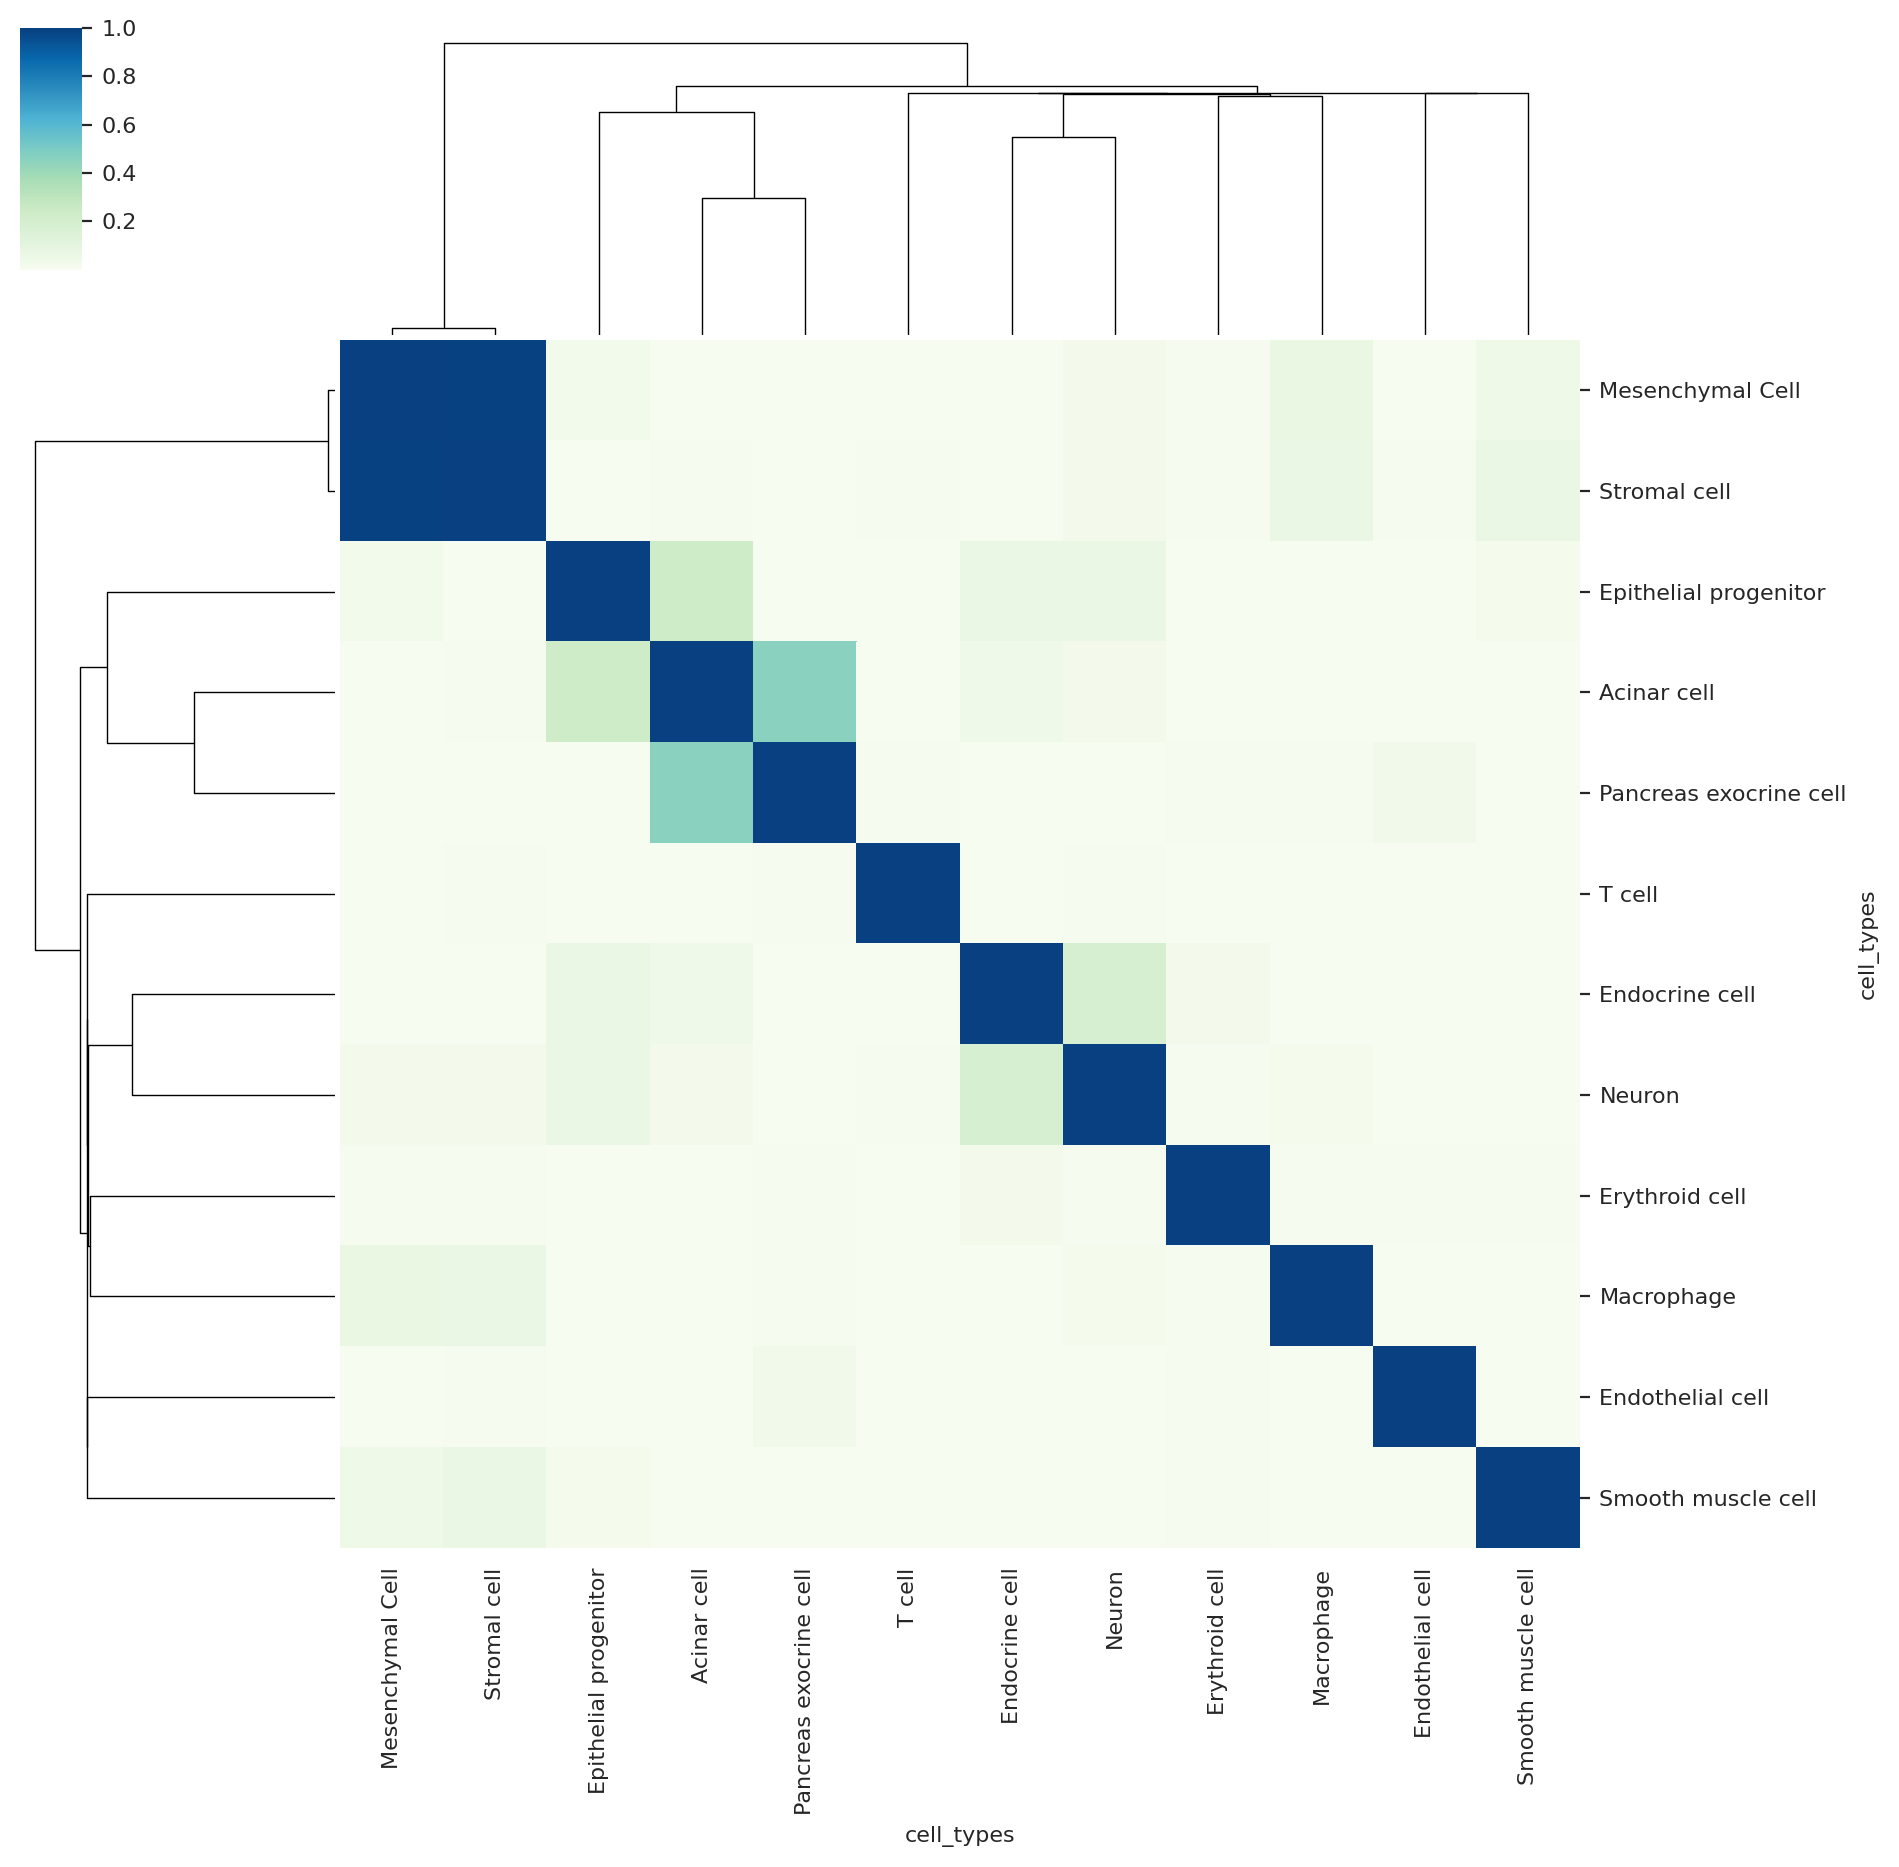

In [88]:
import seaborn as sns
import numpy as np
corr = pd.DataFrame(data = np.corrcoef(centroids_sc_pareto.T), columns = centroids_sc_pareto.columns, index = centroids_sc_pareto.columns)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns_plot =sns.clustermap(np.abs(corr),cmap=sns.color_palette("GnBu", 1000), robust=True)



TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


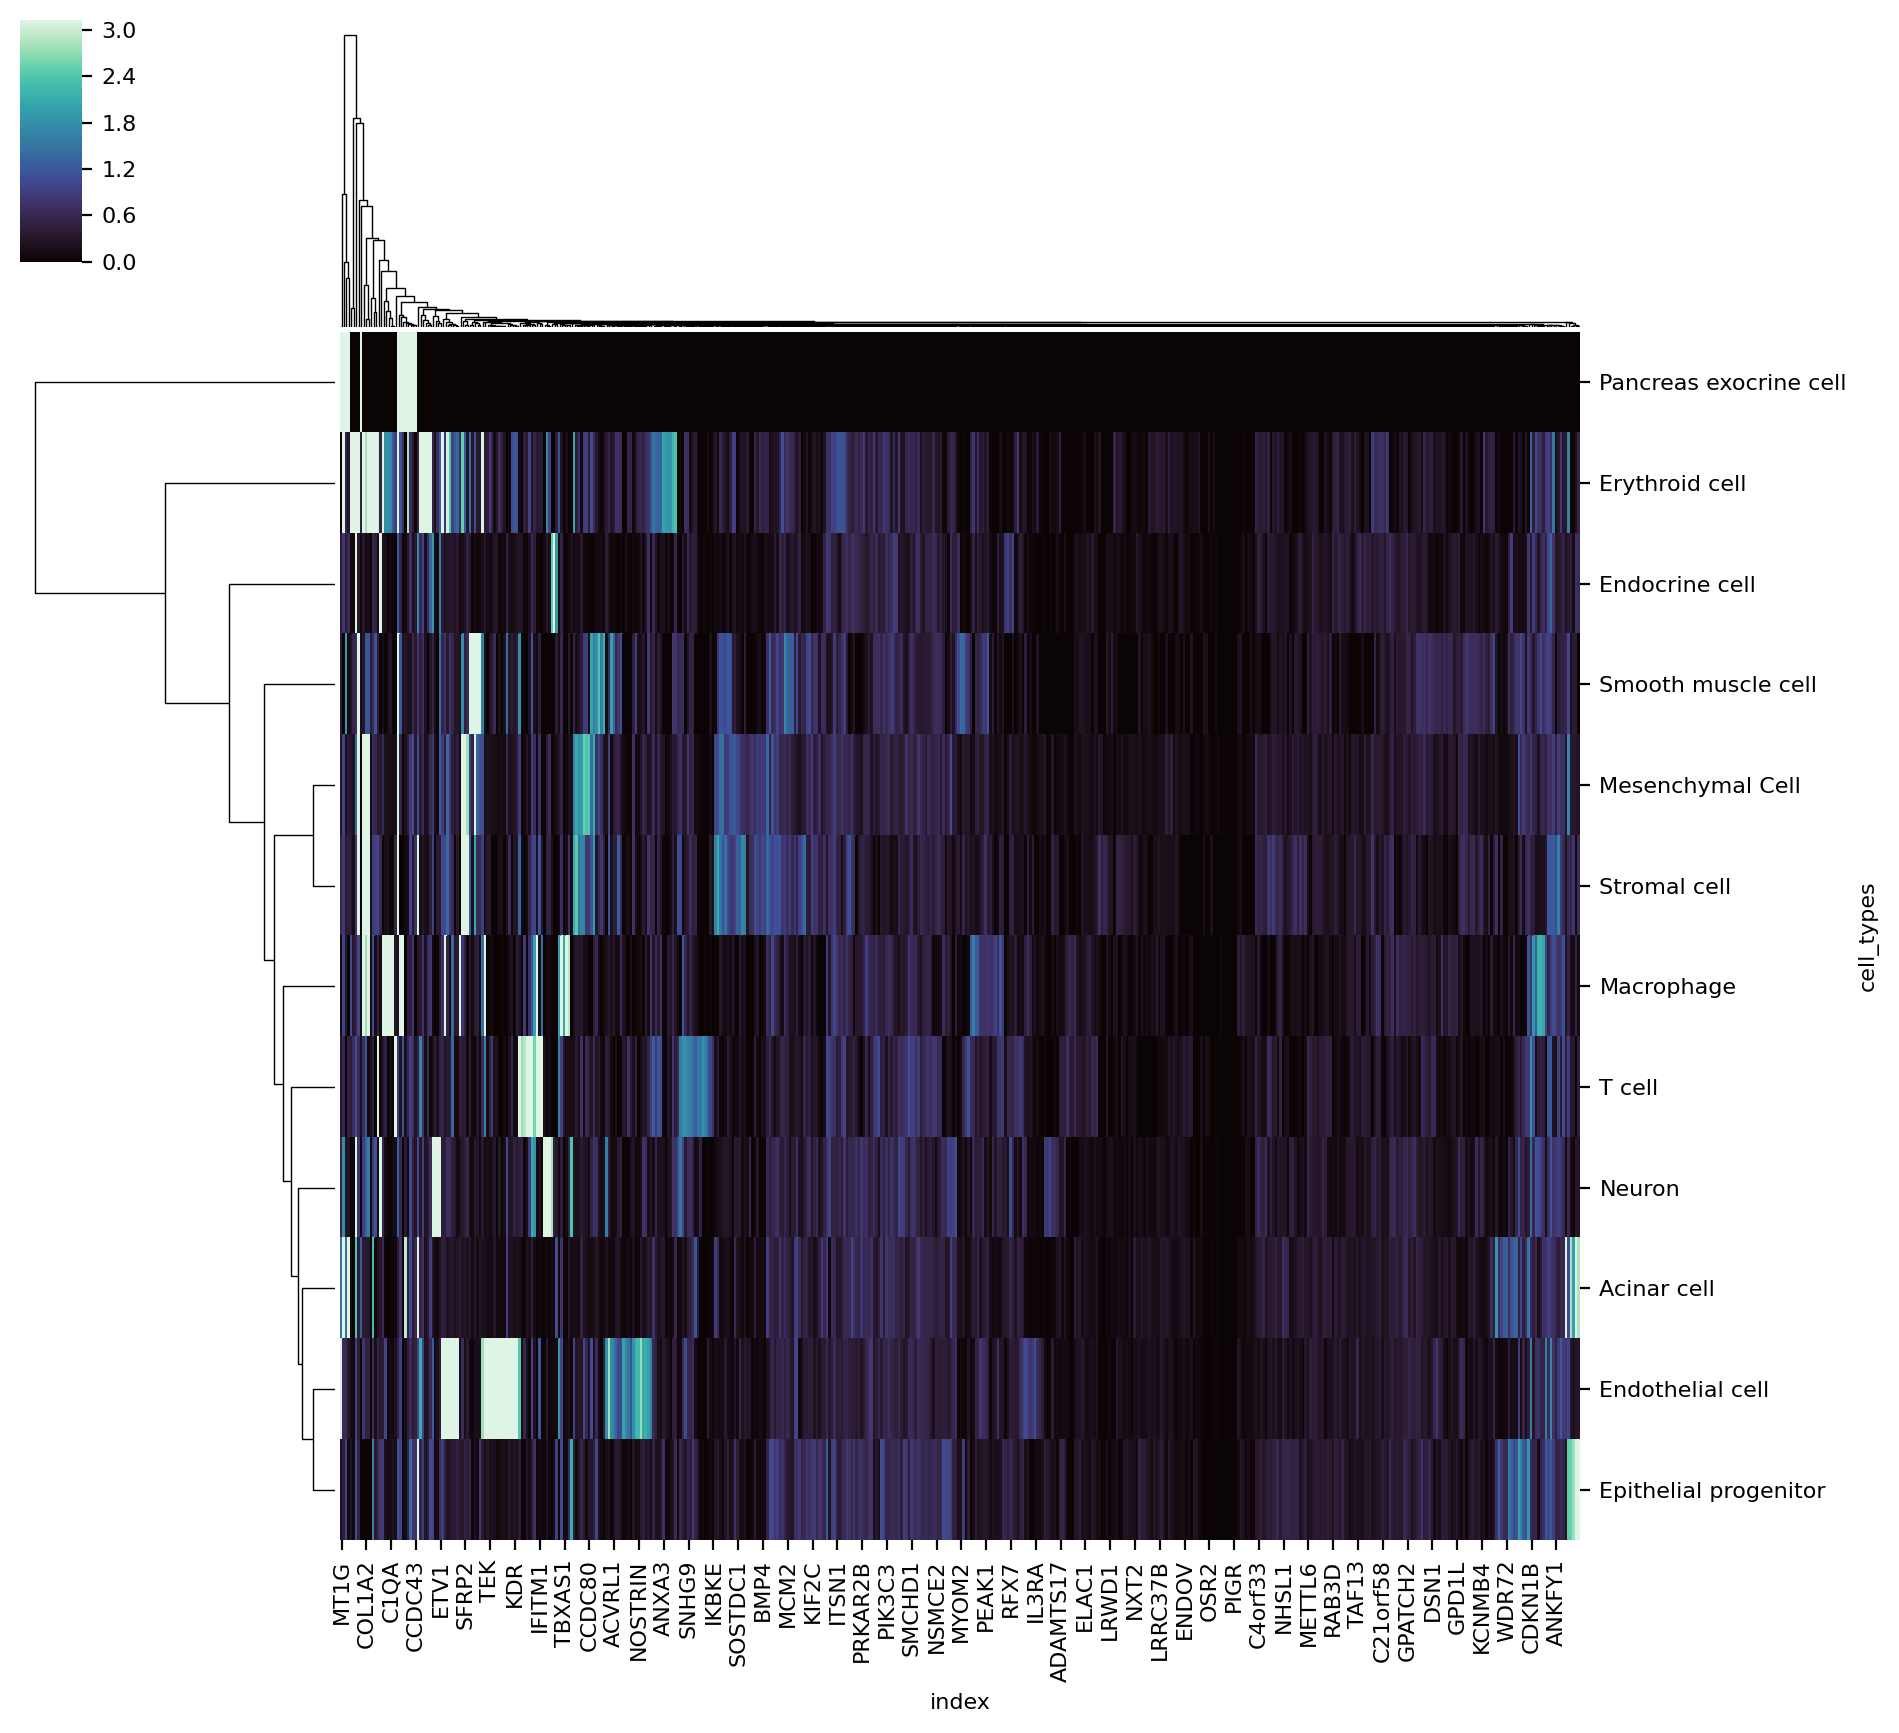

In [89]:
import seaborn as sns
subTypes = pd.DataFrame
subTypes = centroids_sc_pareto.columns
type_pal = sns.husl_palette(centroids_sc_pareto.columns.size, s=0.7)
lut = dict(zip(centroids_sc_pareto.columns.unique(), type_pal))
row_colors = subTypes.map(lut)
sns_plot = sns.clustermap(centroids_sc_pareto.T, cmap="mako", robust=True) #, cmap="mako", robust=True, row_cluster = False)


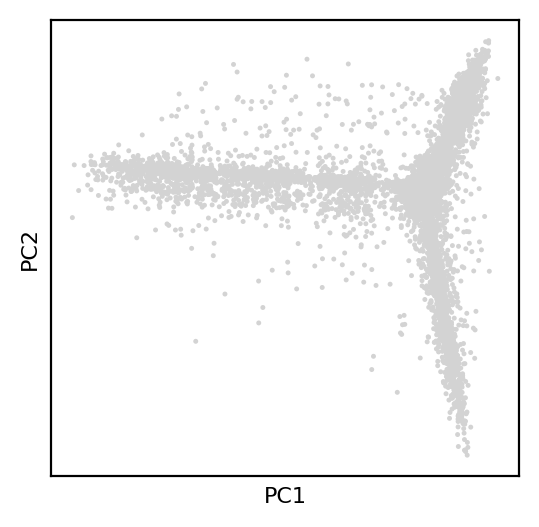

In [90]:
import scipy as sci
adata_pareto = adata_log[:,centroids_sc_pareto.index].copy()
adata_pareto = adata_pareto[adata.obs_names]
#adata_log.X = adata_log.X.todense()
sc.tl.pca(adata_pareto)
adata_pareto.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_pareto)
sc.pp.neighbors(adata_pareto, n_neighbors=20)
sc.tl.umap(adata_pareto)

In [91]:
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, dpi_save=300, vector_friendly=True)
params = {'legend.fontsize': 8,
          'figure.figsize': (3, 3),
         'axes.labelsize':8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)

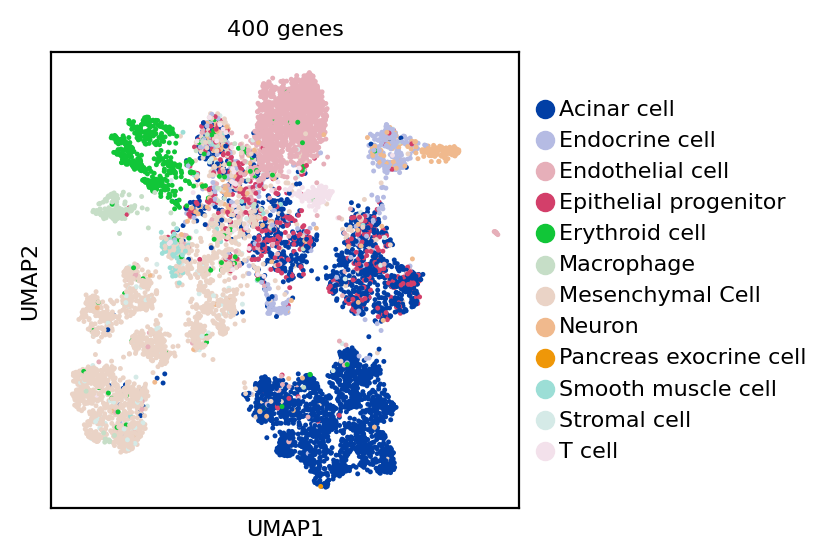

In [92]:
sc.pl.umap(adata_pareto, color='oncology',title='400 genes')#, save="_all_microwell_400.pdf")

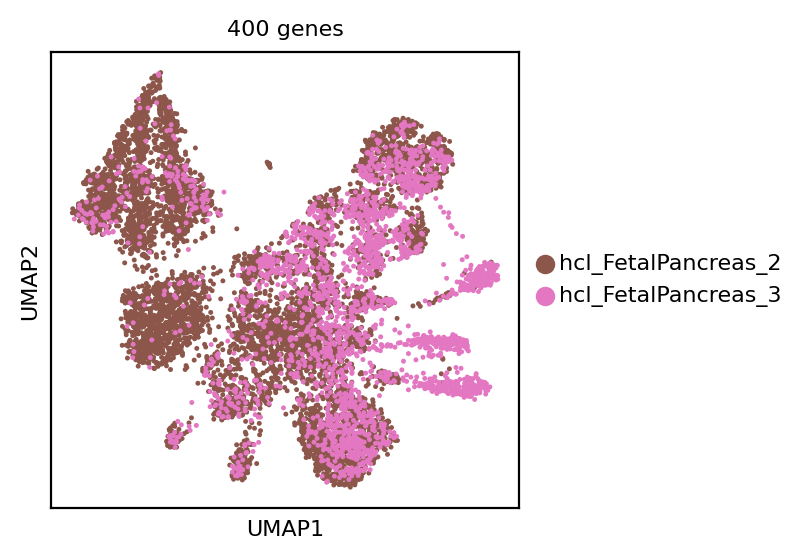

In [81]:
sc.pl.umap(adata_pareto, color='study',title='400 genes')#, save="_sample_all_microwell_400.pdf")

In [ ]:
import scipy as sci

sc.tl.pca(adata_log)
adata_log.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_log)
sc.pp.neighbors(adata_log, n_neighbors=20)
sc.tl.umap(adata_log)

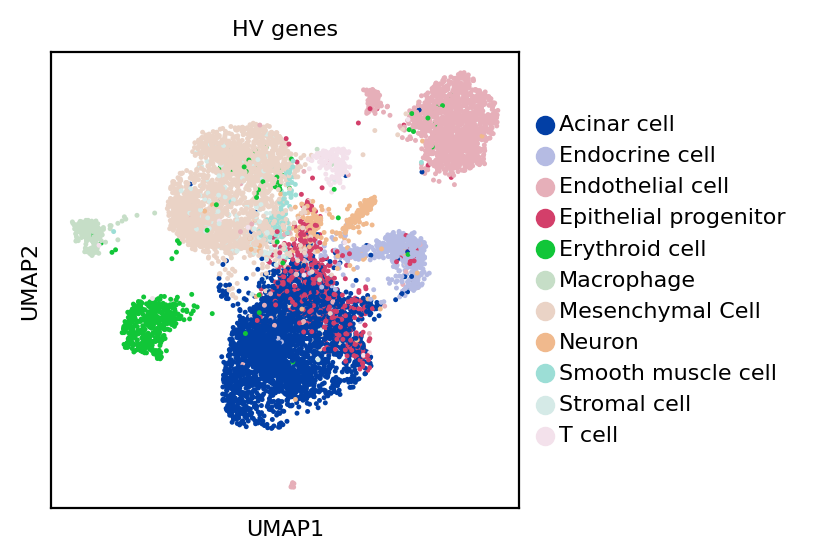

In [23]:
sc.pl.umap(adata_log[adata.obs_names], color='oncology', title = 'HV genes')#,save="_microwell_hv.pdf")

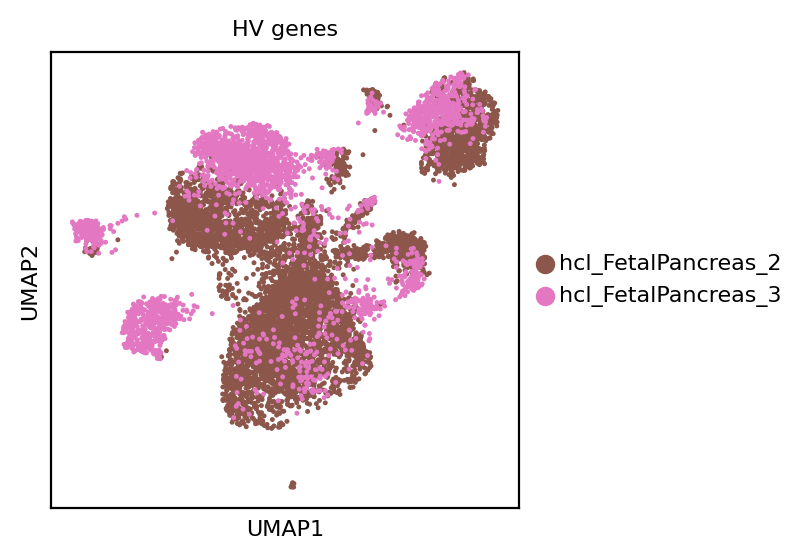

In [24]:
sc.pl.umap(adata_log[adata.obs_names], color='study', title = 'HV genes')#,save="_sample_microwell_hv.pdf")

In [25]:
adata_log = adata_log[adata.obs_names]

In [26]:
adata_log = adata_log[adata_log.obs['oncology']!='Pancreas exocrine cell']

In [27]:
sc.tl.rank_genes_groups(adata_log, groupby='oncology', key_added='rank_genes')
mg = []
clusters = set(adata_log.obs['oncology'])
markers = pd.DataFrame(columns = clusters)
test = pd.DataFrame()
list_mg = []
for clust in clusters:
    mg = adata_log.uns['rank_genes']['names'][clust][:42]
    score = adata_log.uns['rank_genes']['scores'][clust][:42]
    logfc = adata_log.uns['rank_genes']['logfoldchanges'][clust][:42]
    pval = adata_log.uns['rank_genes']['pvals'][clust][:42]
    qval = adata_log.uns['rank_genes']['pvals_adj'][clust][:42]
    list_mg.extend(mg)
    markers.loc[:,clust] = mg
    i=0
    for g in mg:
        pt = pd.Series([clust,mg[i],score[i],logfc[i],pval[i],qval[i]],['cluster','gene','logFC','score','pvalue','pvalue_adj'])
        test = test.append([pt], ignore_index=True)
        i=i+1
        if i>1000:
            break


Trying to set attribute `.uns` of view, copying.


In [28]:
len(set(list_mg))

399

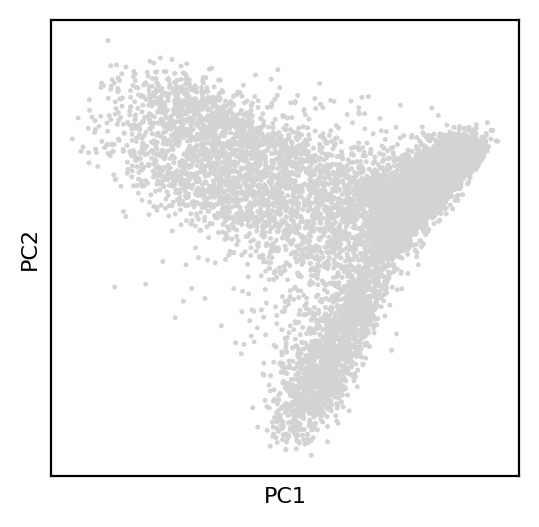

In [29]:
adata_mg = adata_log[:,list(set(list_mg))].copy()
sc.tl.pca(adata_mg)
adata_mg.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_mg)
sc.pp.neighbors(adata_mg, n_neighbors=20)
sc.tl.umap(adata_mg)

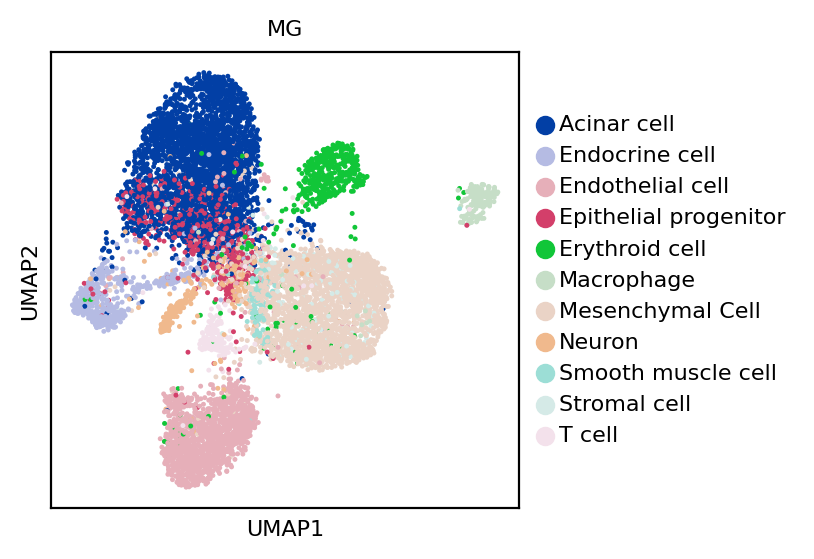

In [30]:
sc.pl.umap(adata_mg,color='oncology',title='MG', save="_all_microwell_MG.pdf")

In [94]:
cibersort_sig = pd.read_csv(write_folder+'Cibersort_pancres_fatal.txt',sep='\t',index_col=0)

In [95]:
cibersort_sig.shape

(2109, 11)

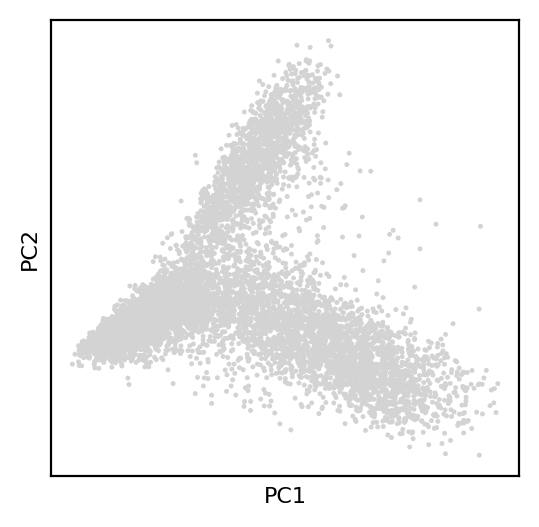

In [32]:
adata_cibersort = adata_log[:,cibersort_sig.index].copy()
sc.tl.pca(adata_cibersort)
adata_pareto.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.pl.pca_scatter(adata_cibersort)
sc.pp.neighbors(adata_cibersort, n_neighbors=20)
sc.tl.umap(adata_cibersort)

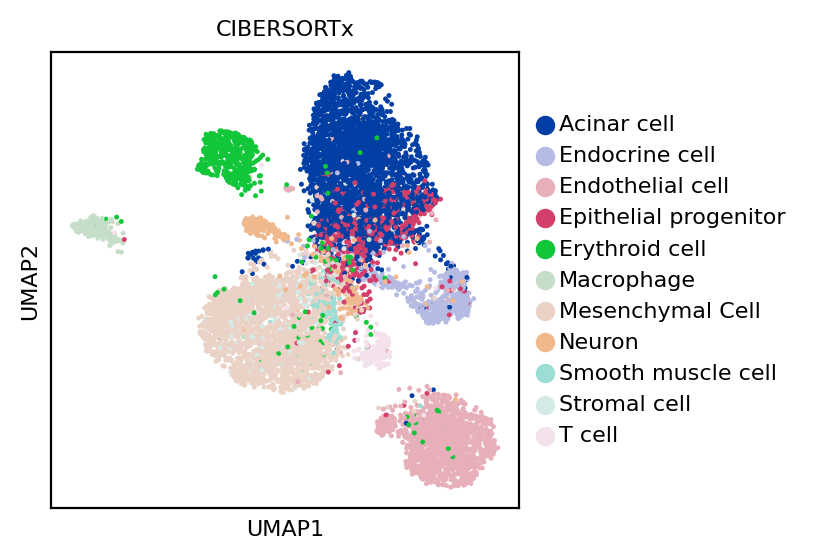

In [33]:
sc.pl.umap(adata_cibersort,color='oncology',title='CIBERSORTx', save="_all_microwell_cibersort.pdf")

In [34]:
### Silhouette score
def silhouette(adata, group_key, metric='euclidean', embed='X_pca', scale=True):
    """
    wrapper for sklearn silhouette function values range from [-1, 1] with 1 being an ideal fit, 0 indicating overlapping clusters and -1 indicating misclassified cells
    """
    import sklearn.metrics as scm
    
    if embed not in adata.obsm.keys():
        print(adata.obsm.keys())
        raise KeyError(f'{embed} not in obsm')
    asw = scm.silhouette_score(adata.obsm[embed], adata.obs[group_key])
    if scale:
        asw = (asw + 1)/2
    return asw

def silhouette_batch(adata, batch_key, group_key, metric='euclidean', 
                     embed='X_pca', verbose=True, scale=True):
    """
    Silhouette score of batch labels subsetted for each group.
    params:
        batch_key: batches to be compared against
        group_key: group labels to be subsetted by e.g. cell type
        metric: see sklearn silhouette score
        embed: name of column in adata.obsm
    returns:
        all scores: absolute silhouette scores per group label
        group means: if `mean=True`
    """
    import sklearn.metrics as scm

    if embed not in adata.obsm.keys():
        print(adata.obsm.keys())
        raise KeyError(f'{embed} not in obsm')
    
    sil_all = pd.DataFrame(columns=['group', 'silhouette_score'])
    
    for group in adata.obs[group_key].unique():
        adata_group = adata[adata.obs[group_key] == group]
        if adata_group.obs[batch_key].nunique() == 1:
            continue
        sil_per_group = scm.silhouette_samples(adata_group.obsm[embed],
                                               adata_group.obs[batch_key],
                                               metric=metric)
        # take only absolute value
        sil_per_group = [abs(i) for i in sil_per_group]
        if scale:
            # scale s.t. highest number is optimal
            sil_per_group = [1 - i for i in sil_per_group]
        d = pd.DataFrame({'group' : [group]*len(sil_per_group), 'silhouette_score' : sil_per_group})
        sil_all = sil_all.append(d)    
    sil_all = sil_all.reset_index(drop=True)
    sil_means = sil_all.groupby('group').mean()
    
    if verbose:
        print(f'mean silhouette per cell: {sil_means}')
    return sil_all, sil_means

def plot_silhouette_score(adata_dict, batch_key, group_key, metric='euclidean', 
                     embed='X_pca', palette='Dark2', per_group=False, verbose=True):
    """
    params:
        adata_dict: dictionary of adata objects, each labeled by e.g. integration method name
    """
    
    with sns.color_palette(palette):
        for label, adata in adata_dict.items():
            checkAdata(adata)
            sil_scores = silhouette(adata, 
                                          batch_key=batch_key,
                                          group_key=group_key,
                                          metric=metric,
                                          embed=embed,
                                          means=False,
                                          verbose=verbose)
            sns.distplot(sil_scores['silhouette_score'], label=label, hist=False)
        plt.title('Silhouette scores per cell for all groups')
        plt.show()
        
        if per_group:
            for data_set, adata in adata_dict.items():
                sil_scores = silhouette(adata,
                                              batch_key=batch_key,
                                              group_key=group_key,
                                              metric=metric,
                                              embed=embed,
                                              means=False,
                                              verbose=verbose)
                # plot for all groups
                for group in sil_scores['group'].unique():
                    group_scores = sil_scores[sil_scores['group'] == group]
                    sns.distplot(group_scores['silhouette_score'], label=group, hist=False)
                plt.title(f'Silhouette scores per cell for {data_set}')
                plt.show()

In [35]:
u_p,m_p = silhouette_batch(adata_pareto,batch_key='study',group_key='oncology')

mean silhouette per cell:                        silhouette_score
group                                  
Acinar cell                    0.941837
Endocrine cell                 0.984872
Endothelial cell               0.965770
Epithelial progenitor          0.948646
Erythroid cell                 0.940928
Macrophage                     0.904859
Mesenchymal Cell               0.941156
Neuron                         0.985837
Smooth muscle cell             0.897790
Stromal cell                   0.930440
T cell                         0.925347


In [36]:
u,m = silhouette_batch(adata_log,batch_key='study',group_key='oncology')

mean silhouette per cell:                        silhouette_score
group                                  
Acinar cell                    0.937020
Endocrine cell                 0.903023
Endothelial cell               0.947251
Epithelial progenitor          0.902680
Erythroid cell                 0.844183
Macrophage                     0.870492
Mesenchymal Cell               0.907379
Neuron                         0.947331
Smooth muscle cell             0.911040
Stromal cell                   0.910898
T cell                         0.928343


In [37]:
u_mg,m_mg = silhouette_batch(adata_mg,batch_key='study',group_key='oncology')
np.mean(m_mg)

mean silhouette per cell:                        silhouette_score
group                                  
Acinar cell                    0.944726
Endocrine cell                 0.904951
Endothelial cell               0.946949
Epithelial progenitor          0.901715
Erythroid cell                 0.929729
Macrophage                     0.857780
Mesenchymal Cell               0.921597
Neuron                         0.944761
Smooth muscle cell             0.926585
Stromal cell                   0.918919
T cell                         0.932700


silhouette_score    0.920947
dtype: float64

In [38]:
u_c,m_c = silhouette_batch(adata_cibersort,batch_key='study',group_key='oncology')
np.mean(m_c)

mean silhouette per cell:                        silhouette_score
group                                  
Acinar cell                    0.952526
Endocrine cell                 0.915685
Endothelial cell               0.961288
Epithelial progenitor          0.911939
Erythroid cell                 0.898738
Macrophage                     0.872850
Mesenchymal Cell               0.920904
Neuron                         0.960287
Smooth muscle cell             0.917383
Stromal cell                   0.921587
T cell                         0.937277


silhouette_score    0.924588
dtype: float64

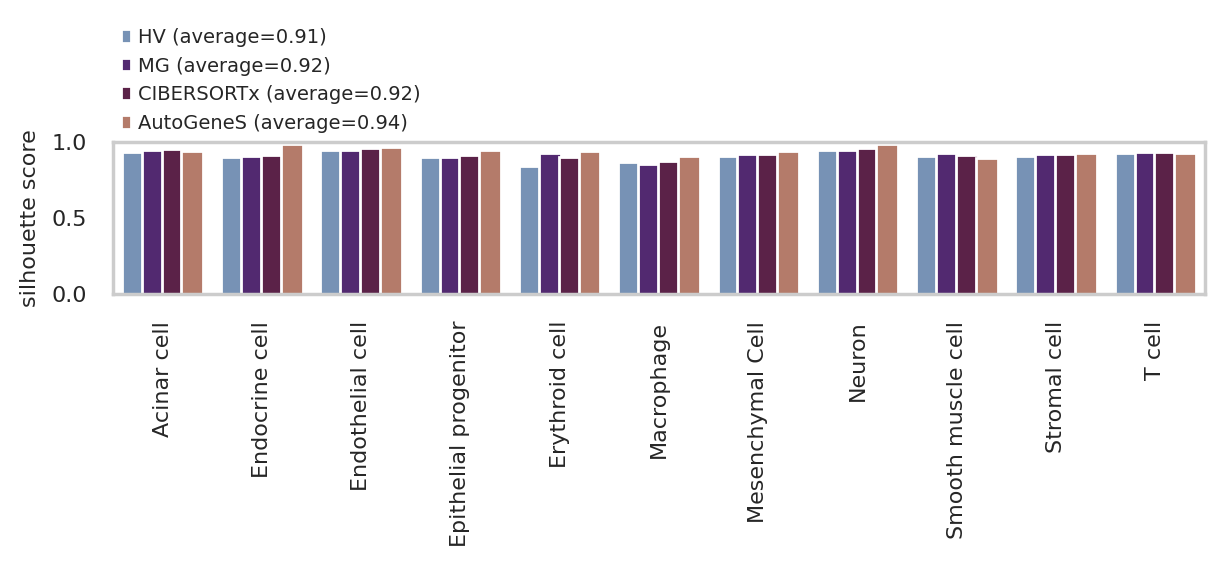

In [43]:
import seaborn as sns, matplotlib.pyplot as plt

sns.set(style="whitegrid")

m.loc[:,'method'] = 'HV (average='+str(round(np.mean(m)[0],2))+')'
m_mg.loc[:,'method'] = 'MG (average='+str(round(np.mean(m_mg)[0],2))+')'
m_p.loc[:,'method'] = 'AutoGeneS (average='+str(round(np.mean(m_p)[0],2))+')'
m_c.loc[:,'method'] = 'CIBERSORTx (average='+str(round(np.mean(m_c)[0],2))+')'


m.loc[:,'cell'] =  m.index
m_p.loc[:,'cell'] = m_p.index
m_c.loc[:,'cell'] = m_c.index
m_mg.loc[:,'cell'] = m_mg.index

m_p.loc[:,'silhouette_score']  = m_p.loc[:,'silhouette_score'].astype(float)
m.loc[:,'silhouette_score']  = m.loc[:,'silhouette_score'].astype(float)
m_c.loc[:,'silhouette_score']  = m_c.loc[:,'silhouette_score'].astype(float)
m_mg.loc[:,'silhouette_score']  = m_mg.loc[:,'silhouette_score'].astype(float)



methods = pd.concat([m.T,m_mg.T,m_c.T,m_p.T],axis=1).T
tips = methods

fig, ax = plt.subplots(figsize=(7, 1))
#sns.set_style("whitegrid", {'axes.grid' : False})
#plt.figure(figsize=(5,5))
with sns.axes_style("whitegrid"):
    sns.barplot(x="cell", y="silhouette_score", hue="method", data=tips,palette="twilight")
    #sns.swarmplot(x="sample", y="secretory cell", hue="method", data=tips, color="0", alpha=.95)
    def change_width(ax, new_value) :
        for patch in ax.patches :
            current_width = patch.get_width()
            diff = current_width - new_value

            # we change the bar width
            patch.set_width(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)

    change_width(ax, .22)



plt.xlabel("")
#plt.title("p-value="+str(round(p,3)))
plt.ylabel("silhouette score",fontsize=8)
#plt.axis('off')
ax.grid(False)
plt.legend(fontsize=6)
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=1,
            borderaxespad=0, frameon=False,fontsize=7)
plt.xticks(rotation='vertical',fontsize=8)
plt.yticks(fontsize=8)
# Turns off grid on the secondary (right) Axis.

#ax.right_ax(False)
#plt.grid()
plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.savefig('silhouette_microwell.pdf')  
plt.show()

In [96]:
#pd.DataFrame(adata.X.T,columns=adata.obs['oncology'],index=adata.var_names).to_csv(write_folder+'cibersort_pancreas_fatal.csv',sep="\t")